# BIRTH RATE MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import statsmodels.api as sm
from sklearn import decomposition
%matplotlib inline

# IMPORTING THE DATA
Truth be told, I downloaded the data as .csvs before I realized that there was an api available.
However, once I discovered the *wbdata* package, I decided to use it to access the World Bank Data via API.

I chose indicators somewhat arbitrarily based mostly on intuition.  Perhaps not the smartest way to go about this project, but I was in a bit of a bind (time-wise).

In [2]:
indicators_smaller = {
    'SP.DYN.CBRT.IN': "Birth rate, crude (per 1,000 people)",
    'NE.CON.TETC.KD': "Final consumption expenditure, etc. (constant 2010 US$)",
    'SL.TLF.CACT.FM.ZS': "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)",
    'SG.JOB.NOPN.EQ': "Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)",
    'SP.POP.TOTL.FE.IN': 'Population, female',
    'SP.POP.TOTL':"Population, total",
    'SE.ENR.PRSC.FM.ZS' : 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
    'SL.UEM.TOTL.FE.ZS' : 'Unemployment, female (% of female labor force) (modeled ILO estimate)',
    'SL.UEM.TOTL.ZS' : 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'SP.URB.TOTL.FE.ZS' : 'Urban population, female (% of total)',
    'SP.URB.TOTL.MA.ZS' : 'Urban population, male (% of total)',
    'SE.TER.ENRR.FE' : 'School enrollment, tertiary, female (% gross)',
    'SE.ENR.TERT.FM.ZS' : 'School enrollment, tertiary (gross), gender parity index (GPI)',
    'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)',
    'NY.GDP.MKTP.CD' : 'GDP (current US$)',
    'NY.GNP.PCAP.CD' : 'GNI per capita, Atlas method (current US$)',
    'NY.GDP.DEFL.KD.ZG' : 'Inflation, GDP deflator (annual %)',
    'IT.NET.USER.P2' : 'Internet users (per 100 people)',
    'SP.DYN.LE00.IN' : 'Life expectancy at birth, total (years)',
    'SE.ADT.LITR.ZS' : 'Literacy rate, adult total (% of people ages 15 and above)',
    'SI.POV.NAHC' : 'Poverty headcount ratio at national poverty lines (% of population)',
    'NV.AGR.TOTL.ZS' : 'Agriculture, value added (% of GDP)',
    'EN.ATM.CO2E.PC' : 'CO2 emissions (metric tons per capita)',
    'GC.DOD.TOTL.GD.ZS' : 'Central government debt, total (% of GDP)'
}

I saved the data using the below.  I later commented it out so that I don't re-copy the dataset everytime I run through this notebook.  The API takes a little while to run to grab all of this data, which was the reason I copied it to my hard drive.  

This had the unintentional benefit of formatting my multilevel dta in a format that I personally understand a little bit better (dataframe).  

In [9]:
df = wbdata.get_dataframe(indicators_smaller, country = "all", )
df.to_csv('df.csv', encoding='utf-8')

In [10]:
df = pd.read_csv('df.csv')
df.shape

(15754, 26)

In [11]:
df.head()

country  date  Agriculture, value added (% of GDP)  \
0  Afghanistan  1960                                  NaN   
1  Afghanistan  1961                                  NaN   
2  Afghanistan  1962                                  NaN   
3  Afghanistan  1963                                  NaN   
4  Afghanistan  1964                                  NaN   

   Birth rate, crude (per 1,000 people)  \
0                                51.276   
1                                51.374   
2                                51.464   
3                                51.544   
4                                51.614   

   CO2 emissions (metric tons per capita)  \
0                                0.046068   
1                                0.053615   
2                                0.073781   
3                                0.074251   
4                                0.086317   

   Central government debt, total (% of GDP)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Final consumption expenditure, etc. (constant 2010 US$)  GDP (current US$)  \
0                                                NaN             5.377778e+08   
1                                                NaN             5.488889e+08   
2                                                NaN             5.466667e+08   
3                                                NaN             7.511112e+08   
4                                                NaN             8.000000e+08   

   GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
0                    NaN                                         NaN   
1                    NaN                                         NaN   
2                    NaN                                         NaN   
3                    NaN                                         NaN   
4                    NaN                                         NaN   

                  ...                   Population, total  \
0                 ...                           8994793.0   
1                 ...                           9164945.0   
2                 ...                           9343772.0   
3                 ...                           9531555.0   
4                 ...                           9728645.0   

   Poverty headcount ratio at national poverty lines (% of population)  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  \
0                                                NaN                                   
1                                                NaN                                   
2                                                NaN                                   
3                                                NaN                                   
4                                                NaN                                   

   School enrollment, primary and secondary (gross), gender parity index (GPI)  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

   School enrollment, tertiary (gross), gender parity index (GPI)  

In [12]:
df.head()

country  date  Agriculture, value added (% of GDP)  \
0  Afghanistan  1960                                  NaN   
1  Afghanistan  1961                                  NaN   
2  Afghanistan  1962                                  NaN   
3  Afghanistan  1963                                  NaN   
4  Afghanistan  1964                                  NaN   

   Birth rate, crude (per 1,000 people)  \
0                                51.276   
1                                51.374   
2                                51.464   
3                                51.544   
4                                51.614   

   CO2 emissions (metric tons per capita)  \
0                                0.046068   
1                                0.053615   
2                                0.073781   
3                                0.074251   
4                                0.086317   

   Central government debt, total (% of GDP)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Final consumption expenditure, etc. (constant 2010 US$)  GDP (current US$)  \
0                                                NaN             5.377778e+08   
1                                                NaN             5.488889e+08   
2                                                NaN             5.466667e+08   
3                                                NaN             7.511112e+08   
4                                                NaN             8.000000e+08   

   GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
0                    NaN                                         NaN   
1                    NaN                                         NaN   
2                    NaN                                         NaN   
3                    NaN                                         NaN   
4                    NaN                                         NaN   

                  ...                   Population, total  \
0                 ...                           8994793.0   
1                 ...                           9164945.0   
2                 ...                           9343772.0   
3                 ...                           9531555.0   
4                 ...                           9728645.0   

   Poverty headcount ratio at national poverty lines (% of population)  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  \
0                                                NaN                                   
1                                                NaN                                   
2                                                NaN                                   
3                                                NaN                                   
4                                                NaN                                   

   School enrollment, primary and secondary (gross), gender parity index (GPI)  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

   School enrollment, tertiary (gross), gender parity index (GPI)  

# Plotting my target data
Birth rates around the world since 1960

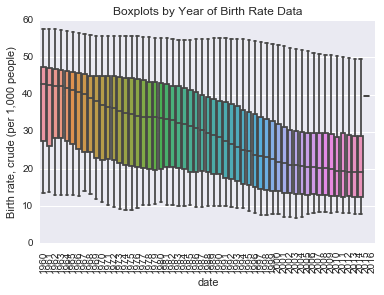

In [13]:
brplot = sns.boxplot(df['date'], df['Birth rate, crude (per 1,000 people)'])
brplot.set_xticklabels(df['date'], rotation=90)
plt.title("Boxplots by Year of Birth Rate Data")

Birth rate seems to have a relatively large range.  The overall birthrate is decreasing over the years.  The average birthrate of all the countries (that report it) per year is actually a relatively linear series.

Overall the variance seems to be getting tighter while the range is not.  I'm not sure why (I actually did not check the extreme values).

# Plotting all of the data

In [14]:
#BIRTHRATE FOR ONE COUNTRY
def get_birthratedf(country):
    return df[df.iloc[:,0] == country].iloc[:, [0, 1, 3]]

In [15]:
#ANY INDICATOR FROM ANY COUNTRY(IES)
def get_fromdf(country, indicator):
    return df[ df.ix[:,0] == country].ix[:, ['country', 'date', indicator]]

In [16]:
USbirthrate = get_fromdf("United States", "Birth rate, crude (per 1,000 people)")

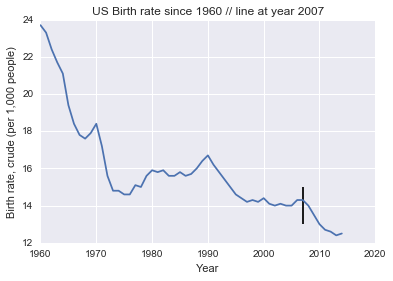

In [17]:
plt.plot('date', "Birth rate, crude (per 1,000 people)", data = USbirthrate)
plt.xlabel('Year')
plt.ylabel("Birth rate, crude (per 1,000 people)")
plt.vlines(2007, 13, 15)
plt.title("US Birth rate since 1960 // line at year 2007")
plt.show()

In [18]:
#PLOTTING TIME SERIES
def plotting_indicators(countries, indicator):
    for country in countries:
        country_df = get_fromdf(country, indicator)
        plt.plot('date', indicator, data = country_df)
    plt.legend(countries)
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.show()

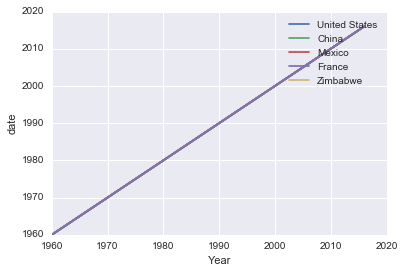

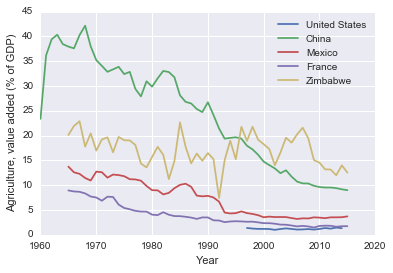

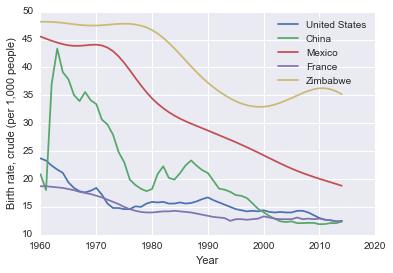

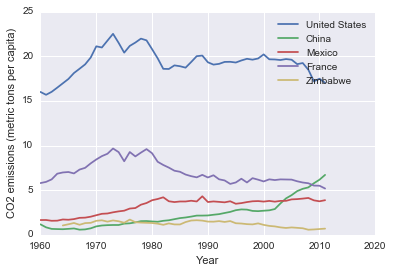

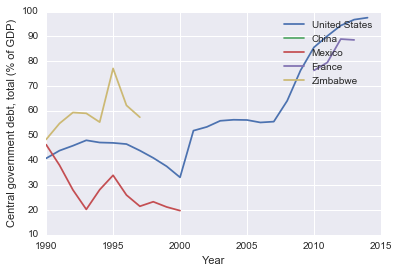

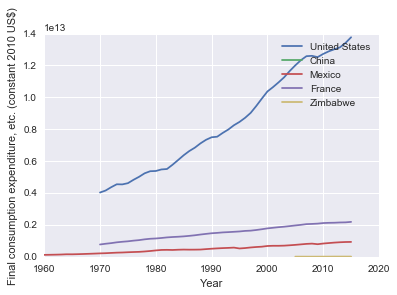

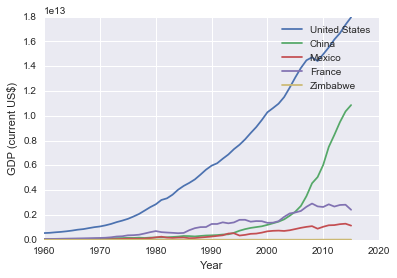

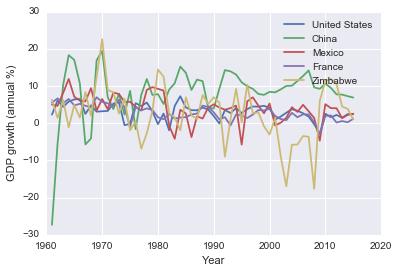

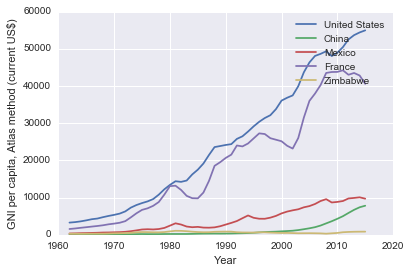

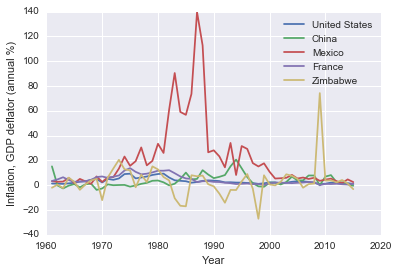

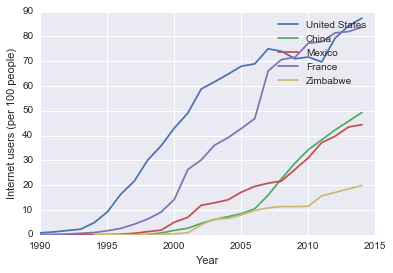

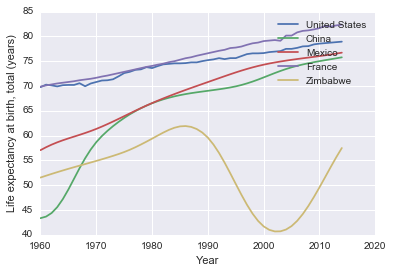

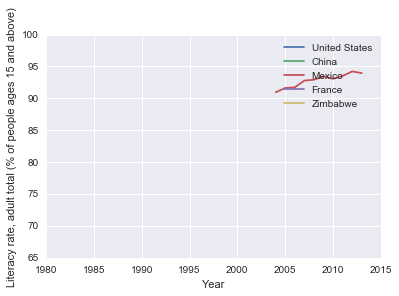

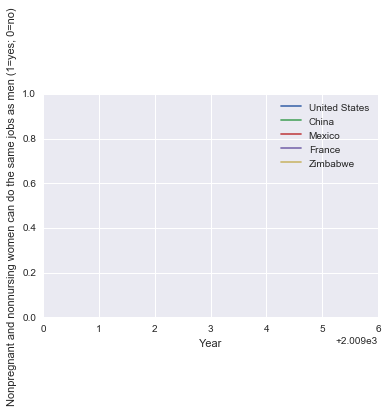

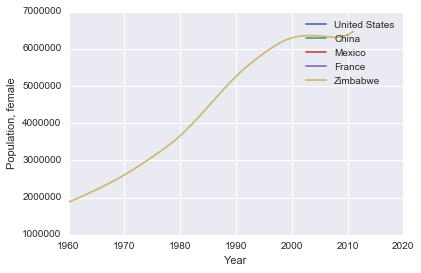

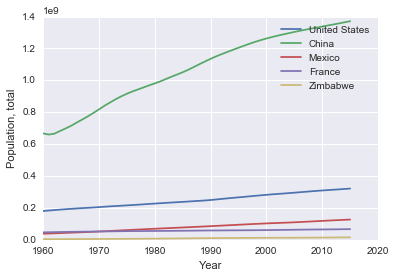

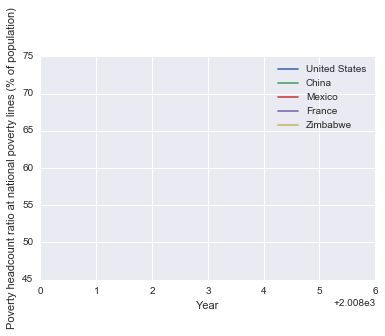

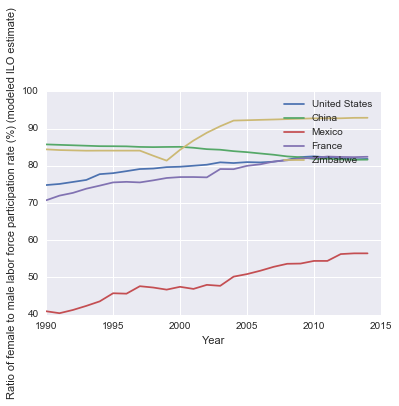

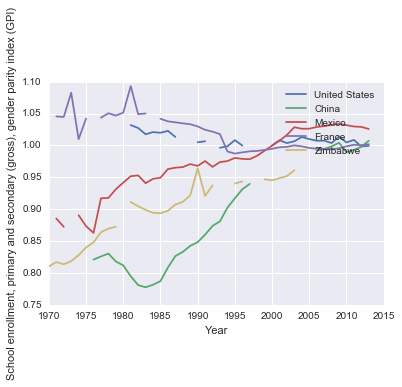

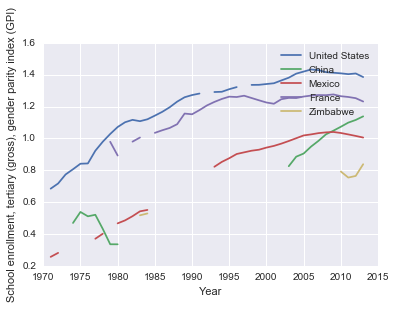

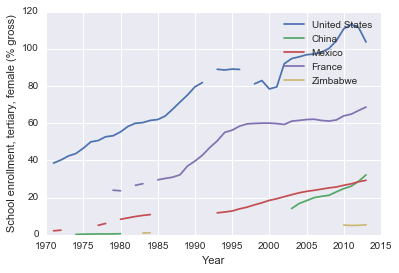

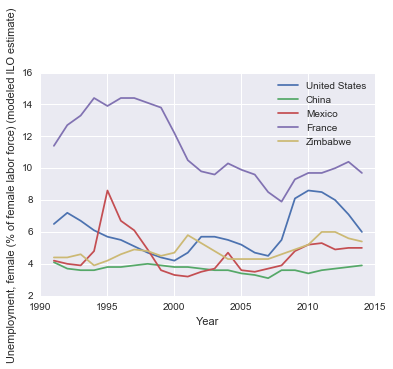

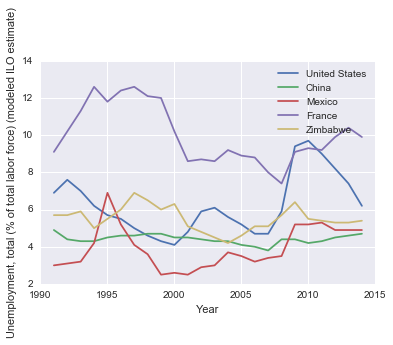

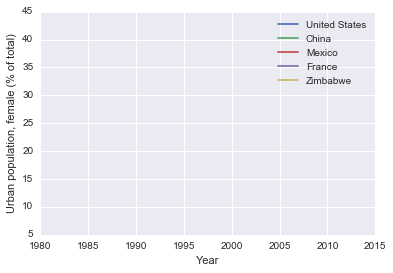

In [19]:
for i in range(1,len(df.columns)-1,1):
    plotting_indicators(['United States', 'China', 'Mexico', 'France', 'Zimbabwe'], df.columns[i])

# Cleaning the data

I noticed at this point that there is a *lot* of missing data for my chosen indicators.  

I also noticed while looking through the dataframe that there were 'Aggregate' series, where World Bank had mad aggregates for regions of the world, along with aggregates for countries in certain income levels (ranking from Low to High).

I decided to clean some of this up before plotting more.

In [20]:
# Dropping rows where the Birth Rate is NA (I do not want to fill target data in)

df = df[ df['Birth rate, crude (per 1,000 people)'].isnull() == False ]
df.shape

(13481, 26)

In [21]:
# Grabbing country codes for each country
# Also grabbing income levels for each country

codes = wbdata.get_country(display = False)
income_levels = []
codeslist = []
countrieslist = []
for i in range(len(codes)):
    codeslist.append(codes[i].get('id'))
    countrieslist.append(codes[i].get('name'))
    incomei = codes[i].get('incomeLevel')
    income_levels.append(incomei.values()[1])

In [22]:
# Grabbing countries and their identifying codes from the WB Database

countriesandcodes = pd.DataFrame(zip(codeslist, countrieslist, income_levels))
countriesandcodes.head()
countriesandcodes.columns = ['code', 'country', 'income level']

In [23]:
df = df.merge(countriesandcodes, how = 'inner')    

In [24]:
# Dropping aggregates 
# These rows had 'countries' that actually represented continents or regions (such as 'Africa')

df = df[ df['income level'] != 'Aggregates']

In [25]:
# The earlier years seem to have the most NAs

df = df[ df['date'] < 2014]
df = df[ df['date'] > 1980]

In [26]:
# Dropping Countries with Population < 100

df = df[ df['Population, total'] > 100]

In [27]:
df.shape

(6628, 28)

In [28]:
# Dropping columns with a LOT of NAs
for column in df.columns:
    if df[column].isnull().sum() > 7776/3:
        df = df.drop(column, 1)

df.isnull().sum()

country                                                                                 0
date                                                                                    0
Agriculture, value added (% of GDP)                                                  1654
Birth rate, crude (per 1,000 people)                                                    0
CO2 emissions (metric tons per capita)                                               1067
GDP (current US$)                                                                     746
GDP growth (annual %)                                                                 818
GNI per capita, Atlas method (current US$)                                           1146
Inflation, GDP deflator (annual %)                                                    845
Internet users (per 100 people)                                                      2576
Life expectancy at birth, total (years)                                               145
Population

At this point, I figured I was at a point where I could move forward with data analysis.  Obviously, I would also require some further cleanup or filling in values.

# More plotting
For now I've figured that the data is clean enough.  I still go through it whenever I can and try and find things that I can modify.  For example, I am working to fill the NAs with reasonable numbers--however I am still working to make an algorithm that works well.

For all intents and purposes I will drop NAs for now.

In [29]:
cleandata = df.dropna()
cleandata.head()

country  date  Agriculture, value added (% of GDP)  \
44  Afghanistan  2004                            30.271674   
45  Afghanistan  2005                            31.750991   
46  Afghanistan  2006                            29.249737   
47  Afghanistan  2007                            30.622854   
48  Afghanistan  2008                            25.394741   

    Birth rate, crude (per 1,000 people)  \
44                                45.761   
45                                44.887   
46                                43.893   
47                                42.779   
48                                41.560   

    CO2 emissions (metric tons per capita)  GDP (current US$)  \
44                                0.040727       5.285462e+09   
45                                0.054855       6.275076e+09   
46                                0.065816       7.057598e+09   
47                                0.088141       9.843842e+09   
48                                0.158962       1.019053e+10   

    GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
44               1.055556                                       220.0   
45              11.175270                                       250.0   
46               5.554138                                       280.0   
47              13.740205                                       340.0   
48               3.611368                                       370.0   

    Inflation, GDP deflator (annual %)  Internet users (per 100 people)  \
44                           11.242729                         0.105809   
45                           10.900268                         1.224148   
46                            7.171261                         2.107124   
47                           22.382016                         1.900000   
48                            2.179103                         1.840000   

    Life expectancy at birth, total (years)  Population, total  \
44                                56.626317         23499850.0   
45                                57.027244         24399948.0   
46                                57.432561         25183615.0   
47                                57.833829         25877544.0   
48                                58.225024         26528741.0   

    Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  \
44                                          16.976456                                   
45                                          17.224288                                   
46                                          17.493797                                   
47                                          17.888198                                   
48                                          18.283582                                   

   code income level  
44  AFG   Low income  
45  AFG   Low income  
46  AFG   Low income  
47  AFG   Low income  
48  AFG   Low income

In [30]:
cleandata.shape
cleandata.columns

Index([u'country', u'date', u'Agriculture, value added (% of GDP)',
       u'Birth rate, crude (per 1,000 people)',
       u'CO2 emissions (metric tons per capita)', u'GDP (current US$)',
       u'GDP growth (annual %)', u'GNI per capita, Atlas method (current US$)',
       u'Inflation, GDP deflator (annual %)',
       u'Internet users (per 100 people)',
       u'Life expectancy at birth, total (years)', u'Population, total',
       u'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
       u'code', u'income level'],
      dtype='object')

In [31]:
# RE-ORDERING COLUMNS
order_of_columns = ["country", 
                    "code", 
                    "income level",
                    'Birth rate, crude (per 1,000 people)',
                    "date", 
                    'Agriculture, value added (% of GDP)',
                    'CO2 emissions (metric tons per capita)', 
                    'GDP (current US$)',
                    'GDP growth (annual %)', 
                    'GNI per capita, Atlas method (current US$)',
                    'Inflation, GDP deflator (annual %)',
                    'Life expectancy at birth, total (years)',
                    'Population, total']

cleandata = cleandata[order_of_columns]
cleandata.date = cleandata.date.astype(float)
cleandata.head()

country code income level  Birth rate, crude (per 1,000 people)  \
44  Afghanistan  AFG   Low income                                45.761   
45  Afghanistan  AFG   Low income                                44.887   
46  Afghanistan  AFG   Low income                                43.893   
47  Afghanistan  AFG   Low income                                42.779   
48  Afghanistan  AFG   Low income                                41.560   

      date  Agriculture, value added (% of GDP)  \
44  2004.0                            30.271674   
45  2005.0                            31.750991   
46  2006.0                            29.249737   
47  2007.0                            30.622854   
48  2008.0                            25.394741   

    CO2 emissions (metric tons per capita)  GDP (current US$)  \
44                                0.040727       5.285462e+09   
45                                0.054855       6.275076e+09   
46                                0.065816       7.057598e+09   
47                                0.088141       9.843842e+09   
48                                0.158962       1.019053e+10   

    GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
44               1.055556                                       220.0   
45              11.175270                                       250.0   
46               5.554138                                       280.0   
47              13.740205                                       340.0   
48               3.611368                                       370.0   

    Inflation, GDP deflator (annual %)  \
44                           11.242729   
45                           10.900268   
46                            7.171261   
47                           22.382016   
48                            2.179103   

    Life expectancy at birth, total (years)  Population, total  
44                                56.626317         23499850.0  
45                                57.027244         24399948.0  
46                                57.432561         25183615.0  
47                                57.833829         25877544.0  
48                                58.225024         26528741.0

In [32]:
cleandata.describe()

Birth rate, crude (per 1,000 people)         date  \
count                           2853.000000  2853.000000   
mean                              23.554514  2002.201542   
std                               11.773677     5.722704   
min                                6.900000  1990.000000   
25%                               12.800000  1998.000000   
50%                               21.499000  2003.000000   
75%                               32.494000  2007.000000   
max                               55.122000  2011.000000   

       Agriculture, value added (% of GDP)  \
count                          2853.000000   
mean                             14.923876   
std                              13.583632   
min                               0.000000   
25%                               3.866541   
50%                               9.982095   
75%                              22.932521   
max                              62.382727   

       CO2 emissions (metric tons per capita)  GDP (current US$)  \
count                             2853.000000       2.853000e+03   
mean                                 4.271693       2.734157e+11   
std                                  5.415447       1.074835e+12   
min                                  0.014649       9.634391e+07   
25%                                  0.569255       4.685730e+09   
50%                                  2.247997       1.826277e+10   
75%                                  6.445128       1.339364e+11   
max                                 61.989758       1.551793e+13   

       GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
count            2853.000000                                 2853.000000   
mean                4.019873                                 8758.454259   
std                 4.957078                                13657.313125   
min               -30.900000                                  100.000000   
25%                 1.787620                                  730.000000   
50%                 4.011814                                 2600.000000   
75%                 6.332565                                 9690.000000   
max                88.957665                                90270.000000   

       Inflation, GDP deflator (annual %)  \
count                         2853.000000   
mean                            23.370702   
std                            188.138132   
min                            -27.632652   
25%                              2.226169   
50%                              5.350398   
75%                             11.017400   
max                           5399.506852   

       Life expectancy at birth, total (years)  Population, total  
count                              2853.000000       2.853000e+03  
mean                                 67.886716       4.083786e+07  
std                                   9.991293       1.428564e+08  
min                                  33.485122       9.515200e+04  
25%                                  61.440902       3.231294e+06  
50%                                  70.845244       8.872109e+06  
75%                                  75.212683       2.652874e+07  
max                                  83.421951       1.344130e+09

In [33]:
cleandata.corr()

Birth rate, crude (per 1,000 people)  \
Birth rate, crude (per 1,000 people)                                    1.000000   
date                                                                   -0.105125   
Agriculture, value added (% of GDP)                                     0.727259   
CO2 emissions (metric tons per capita)                                 -0.531106   
GDP (current US$)                                                      -0.218206   
GDP growth (annual %)                                                   0.063638   
GNI per capita, Atlas method (current US$)                             -0.525541   
Inflation, GDP deflator (annual %)                                      0.020117   
Life expectancy at birth, total (years)                                -0.860633   
Population, total                                                      -0.060682   

                                                date  \
Birth rate, crude (per 1,000 people)       -0.105125   
date                                        1.000000   
Agriculture, value added (% of GDP)        -0.103115   
CO2 emissions (metric tons per capita)      0.022587   
GDP (current US$)                           0.060955   
GDP growth (annual %)                       0.066771   
GNI per capita, Atlas method (current US$)  0.144418   
Inflation, GDP deflator (annual %)         -0.116928   
Life expectancy at birth, total (years)     0.125278   
Population, total                          -0.009423   

                                            Agriculture, value added (% of GDP)  \
Birth rate, crude (per 1,000 people)                                   0.727259   
date                                                                  -0.103115   
Agriculture, value added (% of GDP)                                    1.000000   
CO2 emissions (metric tons per capita)                                -0.546074   
GDP (current US$)                                                     -0.207100   
GDP growth (annual %)                                                  0.071888   
GNI per capita, Atlas method (current US$)                            -0.531090   
Inflation, GDP deflator (annual %)                                     0.032907   
Life expectancy at birth, total (years)                               -0.726927   
Population, total                                                      0.008136   

                                            CO2 emissions (metric tons per capita)  \
Birth rate, crude (per 1,000 people)                                     -0.531106   
date                                                                      0.022587   
Agriculture, value added (% of GDP)                                      -0.546074   
CO2 emissions (metric tons per capita)                                    1.000000   
GDP (current US$)                                                         0.281368   
GDP growth (annual %)                                                    -0.023765   
GNI per capita, Atlas method (current US$)                                0.617866   
Inflation, GDP deflator (annual %)                                       -0.007618   
Life expectancy at birth, total (years)                                   0.493342   
Population, total                                                        -0.012814   

                                            GDP (current US$)  \
Birth rate, crude (per 1,000 people)                -0.218206   
date                                                 0.060955   
Agriculture, value added (% of GDP)                 -0.207100   
CO2 emissions (metric tons per capita)               0.281368   
GDP (current US$)                                    1.000000   
GDP growth (annual %)                               -0.059834   
GNI per capita, Atlas method (current US$)           0.370368   
Inflation, GDP deflator (annual %)                  -0.015792   
Life expectancy at birth, total (years)              0.2

The correlation matrix actually doesn't look too bad.  A lot of my indicators look rather uncorrelated.

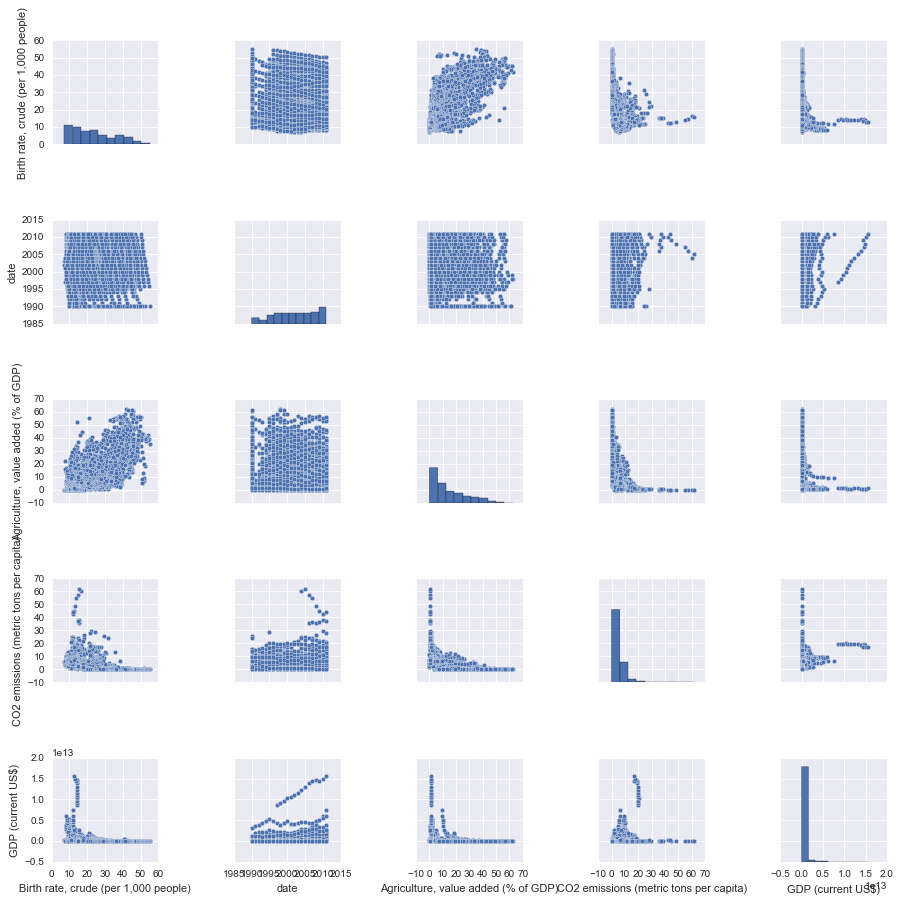

In [34]:
sns.pairplot(cleandata.iloc[:, 1:8])

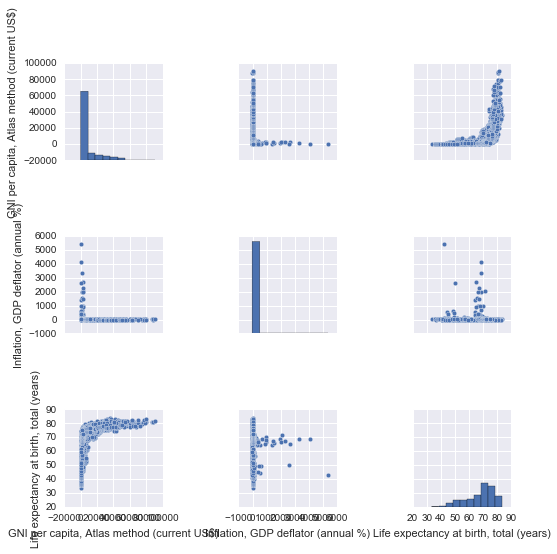

In [35]:
sns.pairplot(cleandata.iloc[:, 9:12])

A lot of these look rather weird, so I will continue to be looking through.

In [36]:
cleandata.head()

country code income level  Birth rate, crude (per 1,000 people)  \
44  Afghanistan  AFG   Low income                                45.761   
45  Afghanistan  AFG   Low income                                44.887   
46  Afghanistan  AFG   Low income                                43.893   
47  Afghanistan  AFG   Low income                                42.779   
48  Afghanistan  AFG   Low income                                41.560   

      date  Agriculture, value added (% of GDP)  \
44  2004.0                            30.271674   
45  2005.0                            31.750991   
46  2006.0                            29.249737   
47  2007.0                            30.622854   
48  2008.0                            25.394741   

    CO2 emissions (metric tons per capita)  GDP (current US$)  \
44                                0.040727       5.285462e+09   
45                                0.054855       6.275076e+09   
46                                0.065816       7.057598e+09   
47                                0.088141       9.843842e+09   
48                                0.158962       1.019053e+10   

    GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
44               1.055556                                       220.0   
45              11.175270                                       250.0   
46               5.554138                                       280.0   
47              13.740205                                       340.0   
48               3.611368                                       370.0   

    Inflation, GDP deflator (annual %)  \
44                           11.242729   
45                           10.900268   
46                            7.171261   
47                           22.382016   
48                            2.179103   

    Life expectancy at birth, total (years)  Population, total  
44                                56.626317         23499850.0  
45                                57.027244         24399948.0  
46                                57.432561         25183615.0  
47                                57.833829         25877544.0  
48                                58.225024         26528741.0

# Getting a better look at some of these indicators

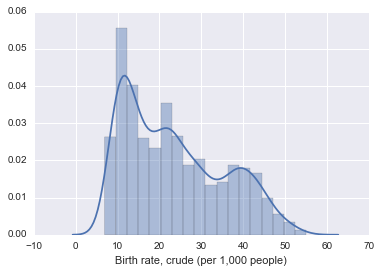

In [37]:
sns.distplot(cleandata.ix[:, 3])

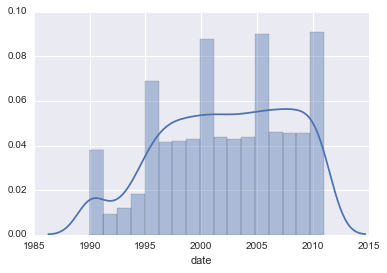

In [38]:
sns.distplot(cleandata.ix[:, 4])

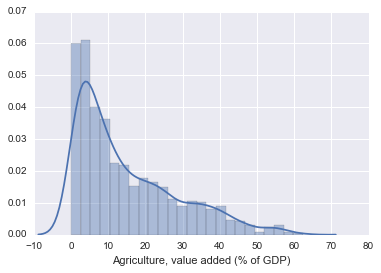

In [39]:
sns.distplot(cleandata.ix[:, 5])

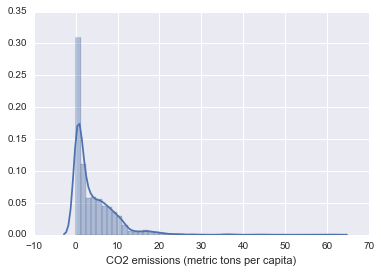

In [40]:
# LOG TRANSFORM CO2
sns.distplot(cleandata.ix[:, 6])

[]

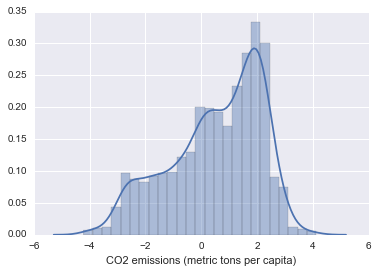

In [41]:
sns.distplot(cleandata.ix[:, 6].apply(np.log))
plt.plot()

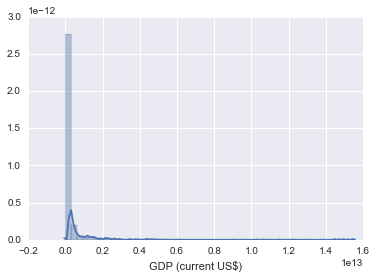

In [42]:
sns.distplot(cleandata.ix[:, 7])


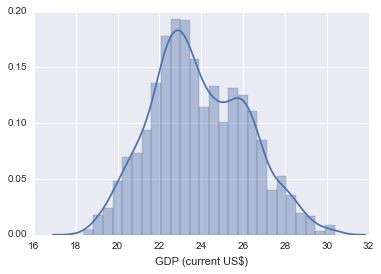

In [43]:
# LOG TRANSFORM GDP
sns.distplot(cleandata.ix[:, 7].apply(np.log))


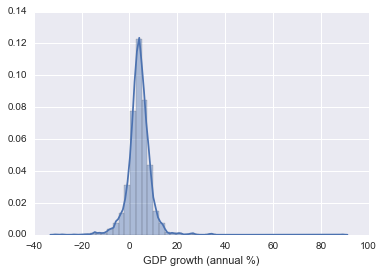

In [44]:
sns.distplot(cleandata.ix[:, 8])

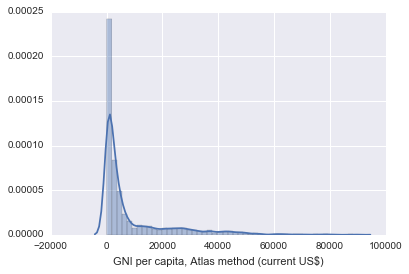

In [45]:
sns.distplot(cleandata.ix[:, 9])

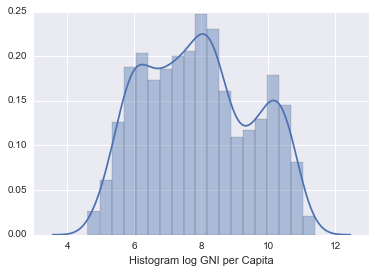

In [46]:
# LOG TRANSFORM GNI
sns.distplot(cleandata.ix[:, 9].apply(np.log))
plt.xlabel("Histogram log GNI per Capita")

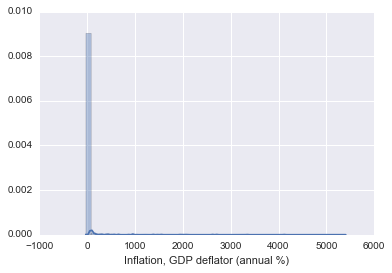

In [47]:
sns.distplot(cleandata.ix[:, 10])
# MIGHT DELETE THIS DUE TO NUMBER OF ZEROES


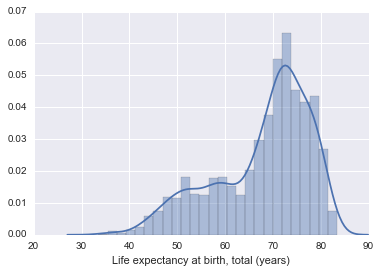

In [48]:
sns.distplot(cleandata.ix[:, 11])


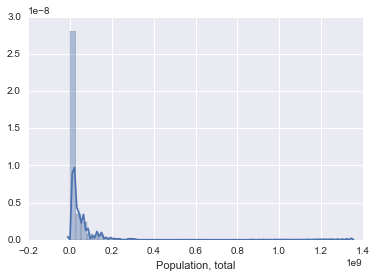

In [49]:
sns.distplot(cleandata.ix[:, 12])

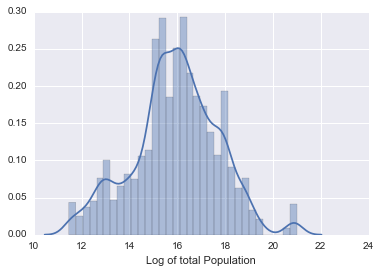

In [50]:
# LOG POPULATION
sns.distplot(cleandata.ix[:, 12].apply(np.log))
plt.xlabel("Log of total Population")

So far I think a good portion of the data is workable, though some of these distributions are rather weird (multiple peaks, etc.)

The one problem I seem to be having is that birth rate doesn't change a whole lot per year.

# Models

## OLS

Starting off with Ordinary least squares on the data that I have.

In [51]:
keep = ["country", 
        "code", 
        "income level",
        'Birth rate, crude (per 1,000 people)',
        "date", 
        'Agriculture, value added (% of GDP)',
        'CO2 emissions (metric tons per capita)', 
        'GDP (current US$)',
        'GDP growth (annual %)', 
        'GNI per capita, Atlas method (current US$)',
        'Life expectancy at birth, total (years)',
        'Population, total']


In [52]:
modeldata = cleandata[keep]
modeldata.shape

(2853, 12)

In [53]:
modeldata.corr()

Birth rate, crude (per 1,000 people)  \
Birth rate, crude (per 1,000 people)                                    1.000000   
date                                                                   -0.105125   
Agriculture, value added (% of GDP)                                     0.727259   
CO2 emissions (metric tons per capita)                                 -0.531106   
GDP (current US$)                                                      -0.218206   
GDP growth (annual %)                                                   0.063638   
GNI per capita, Atlas method (current US$)                             -0.525541   
Life expectancy at birth, total (years)                                -0.860633   
Population, total                                                      -0.060682   

                                                date  \
Birth rate, crude (per 1,000 people)       -0.105125   
date                                        1.000000   
Agriculture, value added (% of GDP)        -0.103115   
CO2 emissions (metric tons per capita)      0.022587   
GDP (current US$)                           0.060955   
GDP growth (annual %)                       0.066771   
GNI per capita, Atlas method (current US$)  0.144418   
Life expectancy at birth, total (years)     0.125278   
Population, total                          -0.009423   

                                            Agriculture, value added (% of GDP)  \
Birth rate, crude (per 1,000 people)                                   0.727259   
date                                                                  -0.103115   
Agriculture, value added (% of GDP)                                    1.000000   
CO2 emissions (metric tons per capita)                                -0.546074   
GDP (current US$)                                                     -0.207100   
GDP growth (annual %)                                                  0.071888   
GNI per capita, Atlas method (current US$)                            -0.531090   
Life expectancy at birth, total (years)                               -0.726927   
Population, total                                                      0.008136   

                                            CO2 emissions (metric tons per capita)  \
Birth rate, crude (per 1,000 people)                                     -0.531106   
date                                                                      0.022587   
Agriculture, value added (% of GDP)                                      -0.546074   
CO2 emissions (metric tons per capita)                                    1.000000   
GDP (current US$)                                                         0.281368   
GDP growth (annual %)                                                    -0.023765   
GNI per capita, Atlas method (current US$)                                0.617866   
Life expectancy at birth, total (years)                                   0.493342   
Population, total                                                        -0.012814   

                                            GDP (current US$)  \
Birth rate, crude (per 1,000 people)                -0.218206   
date                                                 0.060955   
Agriculture, value added (% of GDP)                 -0.207100   
CO2 emissions (metric tons per capita)               0.281368   
GDP (current US$)                                    1.000000   
GDP growth (annual %)                               -0.059834   
GNI per capita, Atlas method (current US$)           0.370368   
Life expectancy at birth, total (years)              0.226675   
Population, total                                    0.315235   

                                            GDP growth (annual %)  \
Birth rate, crude (per 1,000 people)                     0.063638   
date                                                     0.066771   
Agriculture, value added (% of GDP)                      0.071888   
CO2 emissions (metric t

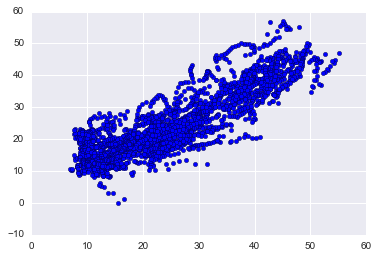

In [54]:
# OLS using SKlearn (so that I can plot)
# I also use statsmodels below, because I personally prefer the output of statsmodels
from sklearn import linear_model


y = modeldata['Birth rate, crude (per 1,000 people)']
X = modeldata.ix[:, 4:]

model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))

In [55]:
# Using Statsmodels
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.773
Model:                                              OLS   Adj. R-squared:                  0.773
Method:                                   Least Squares   F-statistic:                     1385.
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:09:34   Log-Likelihood:                -8967.1
No. Observations:                                  2853   AIC:                         1.795e+04
Df Residuals:                                      2845   BIC:                         1.800e+04
Df Model:                                             7                                         
Covariance Type:                              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
date                                           0.0388      0.001     64.458      0.000         0.038     0.040
Agriculture, value added (% of GDP)            0.1569      0.012     13.185      0.000         0.134     0.180
CO2 emissions (metric tons per capita)        -0.2566      0.026     -9.771      0.000        -0.308    -0.205
GDP (current US$)                           1.483e-13   1.13e-13      1.309      0.191     -7.39e-14   3.7e-13
GDP growth (annual %)                          0.0641      0.022      2.976      0.003         0.022     0.106
GNI per capita, Atlas method (current US$)  3.598e-05   1.12e-05      3.209      0.001       1.4e-05   5.8e-05
Life expectancy at birth, total (years)       -0.8224      0.016    -50.409      0.000        -0.854    -0.790
Population, total                           -4.66e-09   7.95e-10     -5.864      0.000     -6.22e-09  -3.1e-09
==============================================================================
Omnibus:                       11.418   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.719
Skew:                          -0.070   Prob(JB):                      0.00105
Kurtosis:                       3.310   Cond. No.                     2.81e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

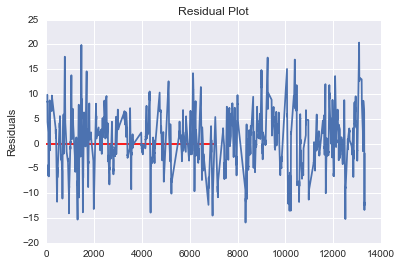

In [56]:
plt.plot(results.resid)
plt.hlines(0, 0, 7000, color = "r")
plt.ylabel('Residuals')
plt.title("Residual Plot")

In [57]:
from sklearn import metrics
metrics.mean_squared_error(y, results.predict(X))

31.443799424039739

The R-squared value of 0.773 is very promising! Also the residual plot doesn't seem to indicate a pattern that I am missing and seems fairly centered around zero.  It does seem like the OLS model plots our data out fairly well.  

After looking at the original birth data values, I do realize that the overall trend is relatively linear, so this result does make some sense.

That said, I will  move forward and try to make the model better.

### Transform the data

Based on my transformations done during the exploratory analysis, I did find that there are a few indicators that would do well if I did log transformation to make the data look more normal.  The three indicators that I transformed are the "GNI per capita", "CO2 emissions", and the "Population". 

In [58]:
modeldata['log GNI per capita'] = modeldata['GNI per capita, Atlas method (current US$)'].apply(np.log)
modeldata['log CO2 emissions'] = modeldata['CO2 emissions (metric tons per capita)'].apply(np.log)
modeldata['log population'] = modeldata['Population, total'].apply(np.log)

In [59]:
modeldata.head()

country code income level  Birth rate, crude (per 1,000 people)  \
44  Afghanistan  AFG   Low income                                45.761   
45  Afghanistan  AFG   Low income                                44.887   
46  Afghanistan  AFG   Low income                                43.893   
47  Afghanistan  AFG   Low income                                42.779   
48  Afghanistan  AFG   Low income                                41.560   

      date  Agriculture, value added (% of GDP)  \
44  2004.0                            30.271674   
45  2005.0                            31.750991   
46  2006.0                            29.249737   
47  2007.0                            30.622854   
48  2008.0                            25.394741   

    CO2 emissions (metric tons per capita)  GDP (current US$)  \
44                                0.040727       5.285462e+09   
45                                0.054855       6.275076e+09   
46                                0.065816       7.057598e+09   
47                                0.088141       9.843842e+09   
48                                0.158962       1.019053e+10   

    GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
44               1.055556                                       220.0   
45              11.175270                                       250.0   
46               5.554138                                       280.0   
47              13.740205                                       340.0   
48               3.611368                                       370.0   

    Life expectancy at birth, total (years)  Population, total  \
44                                56.626317         23499850.0   
45                                57.027244         24399948.0   
46                                57.432561         25183615.0   
47                                57.833829         25877544.0   
48                                58.225024         26528741.0   

    log GNI per capita  log CO2 emissions  log population  
44            5.393628          -3.200855       16.972505  
45            5.521461          -2.903065       17.010092  
46            5.634790          -2.720893       17.041704  
47            5.828946          -2.428817       17.068886  
48            5.913503          -1.839093       17.093739

In [60]:
keep2 = ["country", 
        "code", 
        "income level",
        'Birth rate, crude (per 1,000 people)',
        "date", 
        'Agriculture, value added (% of GDP)',
        'GDP (current US$)',
        'Life expectancy at birth, total (years)',
        'GDP growth (annual %)', 
        'log GNI per capita',
        'log CO2 emissions',
        'log population']

modeldata2 = modeldata[keep2]
modeldata2 = modeldata2.dropna()
modeldata2.head()
modeldata2.describe()

Birth rate, crude (per 1,000 people)         date  \
count                           2853.000000  2853.000000   
mean                              23.554514  2002.201542   
std                               11.773677     5.722704   
min                                6.900000  1990.000000   
25%                               12.800000  1998.000000   
50%                               21.499000  2003.000000   
75%                               32.494000  2007.000000   
max                               55.122000  2011.000000   

       Agriculture, value added (% of GDP)  GDP (current US$)  \
count                          2853.000000       2.853000e+03   
mean                             14.923876       2.734157e+11   
std                              13.583632       1.074835e+12   
min                               0.000000       9.634391e+07   
25%                               3.866541       4.685730e+09   
50%                               9.982095       1.826277e+10   
75%                              22.932521       1.339364e+11   
max                              62.382727       1.551793e+13   

       Life expectancy at birth, total (years)  GDP growth (annual %)  \
count                              2853.000000            2853.000000   
mean                                 67.886716               4.019873   
std                                   9.991293               4.957078   
min                                  33.485122             -30.900000   
25%                                  61.440902               1.787620   
50%                                  70.845244               4.011814   
75%                                  75.212683               6.332565   
max                                  83.421951              88.957665   

       log GNI per capita  log CO2 emissions  log population  
count         2853.000000        2853.000000     2853.000000  
mean             7.916245           0.524430       15.928111  
std              1.613210           1.641668        1.792143  
min              4.605170          -4.223397       11.463231  
25%              6.593045          -0.563426       14.988393  
50%              7.863267           0.810040       15.998423  
75%              9.178850           1.863325       17.093739  
max             11.410560           4.126969       21.019013

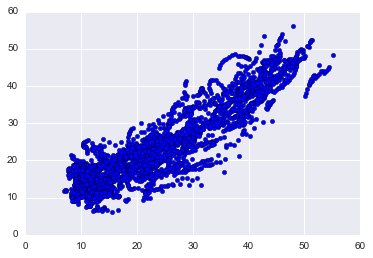

In [61]:
y = modeldata2['Birth rate, crude (per 1,000 people)']
X = modeldata2.ix[:, 4:]


model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))

In [62]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.819
Model:                                              OLS   Adj. R-squared:                  0.819
Method:                                   Least Squares   F-statistic:                     1838.
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:09:35   Log-Likelihood:                -8644.9
No. Observations:                                  2853   AIC:                         1.731e+04
Df Residuals:                                      2845   BIC:                         1.735e+04
Df Model:                                             7                                         
Covariance Type:                              nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
date                                        0.0350      0.001     39.763      0.000         0.033     0.037
Agriculture, value added (% of GDP)        -0.0249      0.014     -1.799      0.072        -0.052     0.002
GDP (current US$)                         1.91e-13   1.02e-13      1.877      0.061     -8.51e-15  3.91e-13
Life expectancy at birth, total (years)    -0.6192      0.017    -36.004      0.000        -0.653    -0.585
GDP growth (annual %)                       0.0031      0.019      0.162      0.871        -0.034     0.041
log GNI per capita                          0.1246      0.142      0.876      0.381        -0.154     0.403
log CO2 emissions                          -3.4345      0.123    -27.890      0.000        -3.676    -3.193
log population                             -0.2165      0.059     -3.663      0.000        -0.332    -0.101
==============================================================================
Omnibus:                       34.606   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.038
Skew:                           0.218   Prob(JB):                     3.33e-09
Kurtosis:                       3.371   Cond. No.                     1.84e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

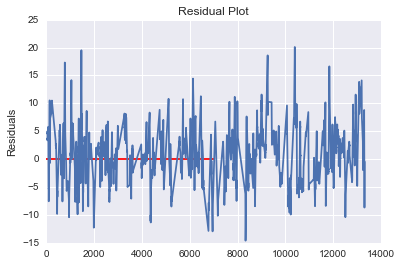

In [63]:
plt.plot(results.resid)
plt.hlines(0, xmin = 0, xmax = 7000, color = "r")
plt.ylabel('Residuals')
plt.title("Residual Plot")

In [64]:
metrics.mean_squared_error(y, results.predict(X))

25.087501668991305

My goodness of fit seems to have gotten better.  Additionally the residual plot here looks pretty good as well.

## OLS continued: Adding in Dummy variables for income level

In [65]:
## Adding in dummies for the income levels
## Joining it with non-transformed data

income_dummies = pd.get_dummies(modeldata['income level'])
modelwithdummies = modeldata.join(income_dummies.ix[:, 1:])
modelwithdummies.head()

country code income level  Birth rate, crude (per 1,000 people)  \
44  Afghanistan  AFG   Low income                                45.761   
45  Afghanistan  AFG   Low income                                44.887   
46  Afghanistan  AFG   Low income                                43.893   
47  Afghanistan  AFG   Low income                                42.779   
48  Afghanistan  AFG   Low income                                41.560   

      date  Agriculture, value added (% of GDP)  \
44  2004.0                            30.271674   
45  2005.0                            31.750991   
46  2006.0                            29.249737   
47  2007.0                            30.622854   
48  2008.0                            25.394741   

    CO2 emissions (metric tons per capita)  GDP (current US$)  \
44                                0.040727       5.285462e+09   
45                                0.054855       6.275076e+09   
46                                0.065816       7.057598e+09   
47                                0.088141       9.843842e+09   
48                                0.158962       1.019053e+10   

    GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
44               1.055556                                       220.0   
45              11.175270                                       250.0   
46               5.554138                                       280.0   
47              13.740205                                       340.0   
48               3.611368                                       370.0   

    Life expectancy at birth, total (years)  Population, total  \
44                                56.626317         23499850.0   
45                                57.027244         24399948.0   
46                                57.432561         25183615.0   
47                                57.833829         25877544.0   
48                                58.225024         26528741.0   

    log GNI per capita  log CO2 emissions  log population  Low income  \
44            5.393628          -3.200855       16.972505         1.0   
45            5.521461          -2.903065       17.010092         1.0   
46            5.634790          -2.720893       17.041704         1.0   
47            5.828946          -2.428817       17.068886         1.0   
48            5.913503          -1.839093       17.093739         1.0   

    Lower middle income  Not classified  Upper middle income  
44                  0.0             0.0                  0.0  
45                  0.0             0.0                  0.0  
46                  0.0             0.0                  0.0  
47                  0.0             0.0                  0.0  
48                  0.0             0.0                  0.0

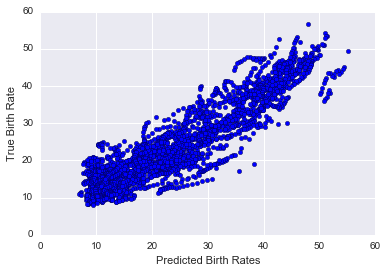

In [66]:
y = modelwithdummies['Birth rate, crude (per 1,000 people)']
X = modelwithdummies.ix[:, 4:]


model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))
plt.xlabel("Predicted Birth Rates")
plt.ylabel("True Birth Rate")

In [67]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.831
Model:                                              OLS   Adj. R-squared:                  0.830
Method:                                   Least Squares   F-statistic:                     998.1
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:09:36   Log-Likelihood:                -8545.2
No. Observations:                                  2853   AIC:                         1.712e+04
Df Residuals:                                      2838   BIC:                         1.721e+04
Df Model:                                            14                                         
Covariance Type:                              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
date                                           0.0286      0.001     22.929      0.000         0.026     0.031
Agriculture, value added (% of GDP)           -0.0546      0.015     -3.751      0.000        -0.083    -0.026
CO2 emissions (metric tons per capita)         0.3138      0.031     10.105      0.000         0.253     0.375
GDP (current US$)                           6.775e-14   1.02e-13      0.662      0.508     -1.33e-13  2.69e-13
GDP growth (annual %)                         -0.0152      0.019     -0.805      0.421        -0.052     0.022
GNI per capita, Atlas method (current US$) -6.762e-06   1.48e-05     -0.458      0.647     -3.57e-05  2.22e-05
Life expectancy at birth, total (years)       -0.5533      0.018    -31.150      0.000        -0.588    -0.518
Population, total                          -1.563e-09   7.71e-10     -2.029      0.043     -3.07e-09 -5.25e-11
log GNI per capita                             0.6484      0.236      2.742      0.006         0.185     1.112
log CO2 emissions                             -3.9921      0.177    -22.571      0.000        -4.339    -3.645
log population                                -0.1510      0.063     -2.384      0.017        -0.275    -0.027
Low income                                     5.8211      0.757      7.691      0.000         4.337     7.305
Lower middle income                            4.7527      0.519      9.161      0.000         3.735     5.770
Not classified                                 4.8885      1.097      4.458      0.000         2.738     7.039
Upper middle income                            2.7740      0.372      7.450      0.000         2.044     3.504
==============================================================================
Omnibus:                       50.353   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.886
Skew:                           0.224   Prob(JB):                     2.99e-15
Kurtosis:                       3.601   Cond. No.                     1.38e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

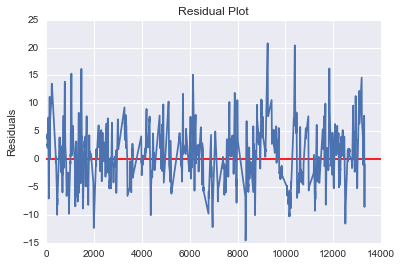

In [68]:
plt.plot(results.resid)
plt.hlines(0, xmin = 0, xmax = 14000, color = "r")
plt.ylabel('Residuals')
plt.title("Residual Plot")

This has improved the model even more!

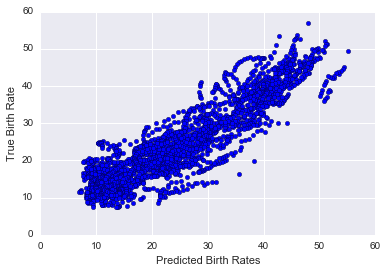

In [70]:
##  Now doing modeling the transformed data + dummies

income_dummies = pd.get_dummies(modeldata['income level'])
modelwithdummies2 = modeldata2.join(income_dummies.ix[:, 1:])


y = modelwithdummies2['Birth rate, crude (per 1,000 people)']
X = modelwithdummies2.ix[:, 4:]

model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))
plt.xlabel("Predicted Birth Rates")
plt.ylabel("True Birth Rate")

In [71]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.825
Model:                                              OLS   Adj. R-squared:                  0.824
Method:                                   Least Squares   F-statistic:                     1213.
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:11:39   Log-Likelihood:                -8600.5
No. Observations:                                  2853   AIC:                         1.723e+04
Df Residuals:                                      2841   BIC:                         1.730e+04
Df Model:                                            11                                         
Covariance Type:                              nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
date                                        0.0305      0.001     28.112      0.000         0.028     0.033
Agriculture, value added (% of GDP)        -0.0362      0.014     -2.533      0.011        -0.064    -0.008
GDP (current US$)                        1.428e-13   1.01e-13      1.419      0.156     -5.45e-14   3.4e-13
Life expectancy at birth, total (years)    -0.5958      0.018    -33.799      0.000        -0.630    -0.561
GDP growth (annual %)                       0.0097      0.019      0.514      0.608        -0.027     0.047
log GNI per capita                          0.7664      0.185      4.153      0.000         0.405     1.128
log CO2 emissions                          -2.8831      0.138    -20.831      0.000        -3.154    -2.612
log population                             -0.2499      0.059     -4.256      0.000        -0.365    -0.135
Low income                                  6.7248      0.762      8.827      0.000         5.231     8.219
Lower middle income                         4.3674      0.526      8.299      0.000         3.335     5.399
Not classified                              4.1328      1.108      3.729      0.000         1.960     6.306
Upper middle income                         1.9998      0.369      5.420      0.000         1.276     2.723
==============================================================================
Omnibus:                       50.236   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.553
Skew:                           0.225   Prob(JB):                     3.53e-15
Kurtosis:                       3.598   Cond. No.                     1.37e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

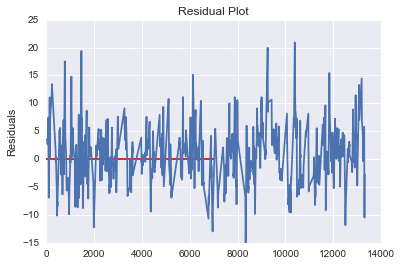

In [72]:
plt.plot(results.resid)
plt.hlines(0, xmin = 0, xmax = 7000, color = "r")
plt.ylabel('Residuals')
plt.title("Residual Plot")

In [73]:
metrics.mean_squared_error(y, results.predict(X))

24.318255991400004

# Random Forest Regressor Model

In [76]:
from sklearn.ensemble import RandomForestRegressor
y = modeldata2['Birth rate, crude (per 1,000 people)']
X = modeldata2.ix[:, 4:]

model = RandomForestRegressor()
randomforest_results = model.fit(X,y)

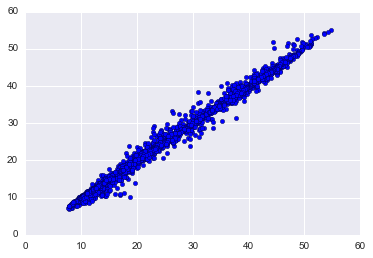

In [77]:
plt.scatter(randomforest_results.predict(X), y)
plt.show()

In [78]:
randomforest_errors = randomforest_results.predict(X) - y
randomforest_squareerrors = randomforest_errors.apply(np.square)
randomforest_mse = np.mean(randomforest_squareerrors)

print "Mean Square Errors:", randomforest_mse
print "Random Forest Score output:", randomforest_results.score(X, y)
pd.DataFrame({'Features': X.columns, 'Importance Score': randomforest_results.feature_importances_})

Mean Square Errors: 1.05464682101
Random Forest Score output: 0.992389117095


Features  Importance Score
0                                     date          0.014495
1      Agriculture, value added (% of GDP)          0.024825
2                        GDP (current US$)          0.014882
3  Life expectancy at birth, total (years)          0.713222
4                    GDP growth (annual %)          0.007537
5                       log GNI per capita          0.014827
6                        log CO2 emissions          0.172084
7                           log population          0.038129

### Adding in dummies

In [79]:
y = modelwithdummies['Birth rate, crude (per 1,000 people)']
X = modelwithdummies.ix[:, 4:]

model = RandomForestRegressor()
randomforest_results = model.fit(X,y)

# Goodness of fit
randomforest_errors = randomforest_results.predict(X) - y
randomforest_squareerrors = randomforest_errors.apply(np.square)
randomforest_mse = np.mean(randomforest_squareerrors)

print "Mean Square Errors:", randomforest_mse
print "Random Forest Score output:", randomforest_results.score(X, y)
pd.DataFrame({'Features': X.columns, 'Importance Score': randomforest_results.feature_importances_})

Mean Square Errors: 0.942482220003
Random Forest Score output: 0.993198555503


Features  Importance Score
0                                         date          0.011933
1          Agriculture, value added (% of GDP)          0.020670
2       CO2 emissions (metric tons per capita)          0.103579
3                            GDP (current US$)          0.014527
4                        GDP growth (annual %)          0.005153
5   GNI per capita, Atlas method (current US$)          0.007012
6      Life expectancy at birth, total (years)          0.709236
7                            Population, total          0.023852
8                           log GNI per capita          0.006457
9                            log CO2 emissions          0.070031
10                              log population          0.019638
11                                  Low income          0.000097
12                         Lower middle income          0.003658
13                              Not classified          0.000220
14                         Upper middle income          0.003936

In [80]:
y = modelwithdummies2['Birth rate, crude (per 1,000 people)']
X = modelwithdummies2.ix[:, 4:]

model = RandomForestRegressor()
randomforest_results = model.fit(X,y)

# Goodness of fit
randomforest_errors = randomforest_results.predict(X) - y
randomforest_squareerrors = randomforest_errors.apply(np.square)
randomforest_mse = np.mean(randomforest_squareerrors)

print "Mean Square Errors:", randomforest_mse
print "Random Forest Score output:", randomforest_results.score(X, y)
pd.DataFrame({'Features': X.columns, 'Importance Score': randomforest_results.feature_importances_})

Mean Square Errors: 0.872323391542
Random Forest Score output: 0.993704858294


Features  Importance Score
0                                      date          0.011599
1       Agriculture, value added (% of GDP)          0.022367
2                         GDP (current US$)          0.015454
3   Life expectancy at birth, total (years)          0.660434
4                     GDP growth (annual %)          0.006029
5                        log GNI per capita          0.013453
6                         log CO2 emissions          0.222779
7                            log population          0.038592
8                                Low income          0.001563
9                       Lower middle income          0.002023
10                           Not classified          0.000407
11                      Upper middle income          0.005301

This random forest model also seems to model our data fairly well.  Adding in the dummies doesn't seem to have a huge effect on the model, but it was worth trying to check out regardless!

# Well that wasn't too bad...but before testing these models I figured I'd change my method of dealing with NAs.

At this point I thought I'd try a different method of dealing with null values in the original data set. 

**As a little bit of a 'warning', the regressions that follow in large part follows the method above, however with a slightly modified data set.**  I added in some variables that I thought of along the way.  I also go forward with further methods such as gridsearch, PCA, and actually finally testing on a 'test' set.

## New strategy!  Let me also fill NAs instead of just dropping them...

In [81]:
df = pd.read_csv('df.csv')
df = df.merge(countriesandcodes, how = 'inner')   
df.columns

Index([u'country', u'date', u'Agriculture, value added (% of GDP)',
       u'Birth rate, crude (per 1,000 people)',
       u'CO2 emissions (metric tons per capita)',
       u'Central government debt, total (% of GDP)',
       u'Final consumption expenditure, etc. (constant 2010 US$)',
       u'GDP (current US$)', u'GDP growth (annual %)',
       u'GNI per capita, Atlas method (current US$)',
       u'Inflation, GDP deflator (annual %)',
       u'Internet users (per 100 people)',
       u'Life expectancy at birth, total (years)',
       u'Literacy rate, adult total (% of people ages 15 and above)',
       u'Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)',
       u'Population, female', u'Population, total',
       u'Poverty headcount ratio at national poverty lines (% of population)',
       u'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
       u'School enrollment, primary and secondary (gross), gender parity index (GPI)'

In [82]:
columnorder = [
    "country",
    "code",
    "date",
    'Birth rate, crude (per 1,000 people)',
    'Agriculture, value added (% of GDP)',
    'CO2 emissions (metric tons per capita)',
    'Central government debt, total (% of GDP)',
    'Final consumption expenditure, etc. (constant 2010 US$)',
    'GDP (current US$)', u'GDP growth (annual %)',
    'GNI per capita, Atlas method (current US$)',
    'Inflation, GDP deflator (annual %)',
    'Internet users (per 100 people)',
    'Life expectancy at birth, total (years)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)',
    'Population, female', u'Population, total',
    'Poverty headcount ratio at national poverty lines (% of population)',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
    'School enrollment, primary and secondary (gross), gender parity index (GPI)',
    'School enrollment, tertiary (gross), gender parity index (GPI)',
    'School enrollment, tertiary, female (% gross)',
    'Unemployment, female (% of female labor force) (modeled ILO estimate)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Urban population, female (% of total)',
    'Urban population, male (% of total)', 
    'income level']
df = df[columnorder]
df = df[ df['Birth rate, crude (per 1,000 people)'].isnull() == False ]
df.shape

(13316, 28)

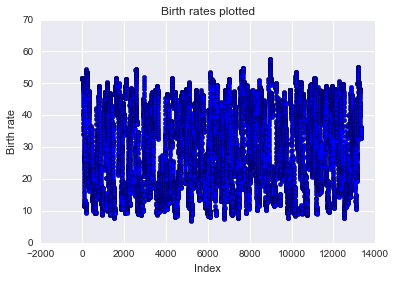

In [83]:
sns.plt.scatter(range(len(df)), df['Birth rate, crude (per 1,000 people)'])
plt.ylabel("Birth rate")
plt.xlabel("Index")
plt.title("Birth rates plotted")

In [84]:
# My attempt of adding a 'time series' like element (done for the sake of time)
# indicating if the birth rate goes up or down from the previous year.

testing = df[['country', 'date', 'Birth rate, crude (per 1,000 people)']]

UporDown = ["na"]
for i in range(1, len(df)):
    diff = testing.iloc[i, 2] - testing.iloc[i-1, 2]
    samecountry = testing.iloc[i, 0] == testing.iloc[i-1, 0]
    consecutiveyear = testing.iloc[i, 1] == testing.iloc[i-1, 1] +1
    if samecountry == True and consecutiveyear == True:
        if diff >= 0:
            UporDown.append("up")
        if diff < 0:
            UporDown.append("down")
    else:
        UporDown.append("na")
        
df['Change'] = UporDown
df = df[ df['Change'] != 'na']

In [85]:
df.isnull().sum()

country                                                                                  0
code                                                                                     0
date                                                                                     0
Birth rate, crude (per 1,000 people)                                                     0
Agriculture, value added (% of GDP)                                                   5045
CO2 emissions (metric tons per capita)                                                2330
Central government debt, total (% of GDP)                                            11633
Final consumption expenditure, etc. (constant 2010 US$)                               6413
GDP (current US$)                                                                     2531
GDP growth (annual %)                                                                 2823
GNI per capita, Atlas method (current US$)                                            3760

In [86]:
# Drop aggregates

df = df[ df["income level"] != "Aggregates"]

# Dropping columns with a LOT of NAs

for column in df.columns:
    if df[column].isnull().sum() > 13316/3:
        df = df.drop(column, 1)

df.isnull().sum()

country                                          0
code                                             0
date                                             0
Birth rate, crude (per 1,000 people)             0
Agriculture, value added (% of GDP)           4210
CO2 emissions (metric tons per capita)        2038
GDP (current US$)                             2241
GDP growth (annual %)                         2497
GNI per capita, Atlas method (current US$)    3152
Inflation, GDP deflator (annual %)            2545
Life expectancy at birth, total (years)        196
Population, total                                6
income level                                     0
Change                                           0
dtype: int64

In [87]:
# Moving Argentina to "High Income"
argentina = df[ df['country'] == "Argentina"]
argentina = argentina.drop("income level", 1)

argentina['income level'] = ["High income"] * len(argentina)

df = df[ df['country'] != "Argentina"]
df = df.append(argentina)

In [88]:
# Fill NAs with GROUPED BY mean.  Grouped countries by their income level
transformed = df.groupby(by = "income level").transform(lambda x: x.fillna(x.mean()))
transformed['income level'] = df['income level']
transformed['country'] = df['country']
transformed['change'] = df['Change']

In [89]:
# compare the new data frame to the old data frame
transformed.groupby('income level').mean()
df.groupby(by = "income level").mean()

Agriculture, value added (% of GDP)  \
income level                                               
High income                                     4.084570   
Low income                                     39.495305   
Lower middle income                            26.203168   
Upper middle income                            13.813102   

                     Birth rate, crude (per 1,000 people)  \
income level                                                
High income                                     17.859443   
Low income                                      45.024057   
Lower middle income                             35.451775   
Upper middle income                             27.935563   

                     CO2 emissions (metric tons per capita)  \
income level                                                  
High income                                       10.504396   
Low income                                         0.168985   
Lower middle income                                0.785939   
Upper middle income                                3.017269   

                     GDP (current US$)  GDP growth (annual %)  \
income level                                                    
High income               3.577299e+11               3.789858   
Low income                3.616587e+09               3.357660   
Lower middle income       3.224577e+10               4.074195   
Upper middle income       1.052315e+11               4.445683   

                     GNI per capita, Atlas method (current US$)  \
income level                                                      
High income                                        17027.028754   
Low income                                           324.544674   
Lower middle income                                  987.507870   
Upper middle income                                 2891.793139   

                     Inflation, GDP deflator (annual %)  \
income level                                              
High income                                   11.302183   
Low income                                    40.275333   
Lower middle income                           43.746904   
Upper middle income                           52.803343   

                     Life expectancy at birth, total (years)  \
income level                                                   
High income                                        73.140590   
Low income                                         48.044730   
Lower middle income                                59.015351   
Upper middle income                                65.579915   

                     Population, total         date  
income level                                         
High income               1.507757e+07  1988.055213  
Low income                1.046170e+07  1987.500000  
Lower middle income       3.607139e+07  1987.766135  
Upper middle income       3.795263e+07  1987.727811

In [90]:
orderofcolumns = ["country", 
                  "income level",
                  'change',
                  'Birth rate, crude (per 1,000 people)',
                  "date", 
                  'Agriculture, value added (% of GDP)',
                  'CO2 emissions (metric tons per capita)', 
                  'GDP (current US$)',
                  'GDP growth (annual %)', 
                  'GNI per capita, Atlas method (current US$)',
                  'Inflation, GDP deflator (annual %)',
                  'Life expectancy at birth, total (years)',
                  'Population, total']
transformed = transformed[orderofcolumns]

In [91]:
transformed.tail()

country income level change  Birth rate, crude (per 1,000 people)  \
559  Argentina  High income   down                                18.153   
560  Argentina  High income   down                                18.018   
561  Argentina  High income   down                                17.874   
562  Argentina  High income   down                                17.716   
563  Argentina  High income   down                                17.544   

     date  Agriculture, value added (% of GDP)  \
559  2010                             8.175132   
560  2011                             7.492465   
561  2012                             6.697421   
562  2013                             7.384590   
563  2014                             8.313524   

     CO2 emissions (metric tons per capita)  GDP (current US$)  \
559                                4.342272       4.616402e+11   
560                                4.562049       5.578902e+11   
561                               10.504396       6.043785e+11   
562                               10.504396       6.239320e+11   
563                               10.504396       5.480549e+11   

     GDP growth (annual %)  GNI per capita, Atlas method (current US$)  \
559               9.451578                                     10490.0   
560               8.386451                                     11840.0   
561               0.801760                                     13060.0   
562               2.885352                                     14180.0   
563               0.453605                                     13640.0   

     Inflation, GDP deflator (annual %)  \
559                           17.210572   
560                           17.797686   
561                           18.666448   
562                           19.712471   
563                           29.341365   

     Life expectancy at birth, total (years)  Population, total  
559                                75.484976         41222875.0  
560                                75.649049         41655616.0  
561                                75.816244         42095224.0  
562                                75.986098         42538304.0  
563                                76.158610         42980026.0

In [107]:
transformed.shape

(10650, 12)

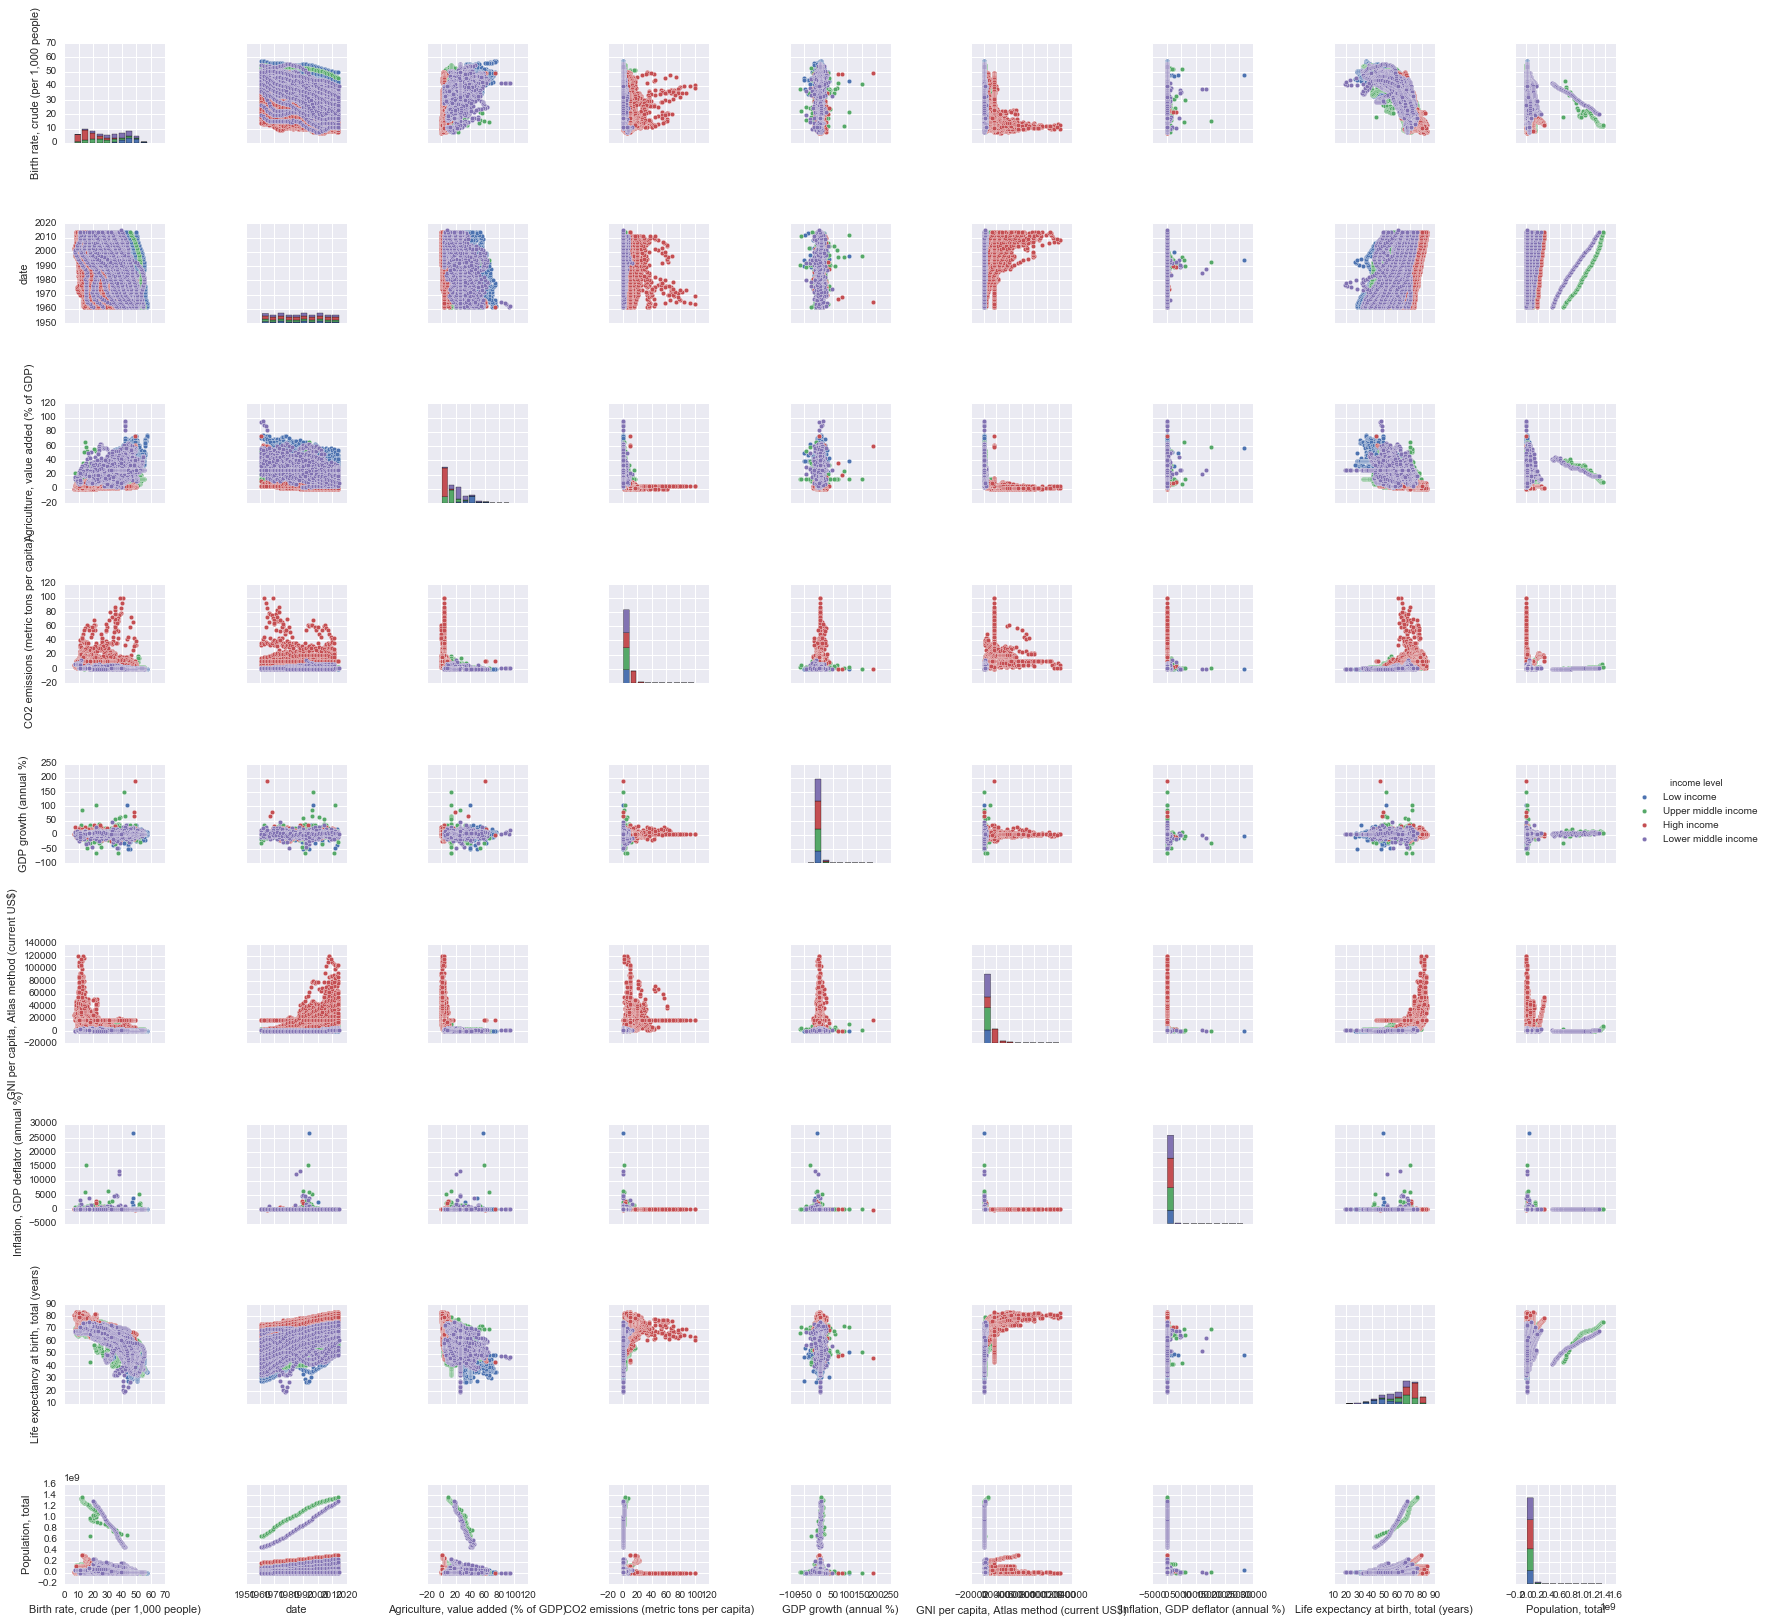

In [108]:
sns.pairplot(transformed, hue = "income level")

In [113]:
# I did one regression before this (regretfully deleted) 
# going to take out the GDP (current US$) due to its very high p value
transformed = transformed.drop('GDP (current US$)', 1)

Index([u'country', u'income level', u'change',
       u'Birth rate, crude (per 1,000 people)', u'date',
       u'Agriculture, value added (% of GDP)',
       u'CO2 emissions (metric tons per capita)', u'GDP growth (annual %)',
       u'GNI per capita, Atlas method (current US$)',
       u'Inflation, GDP deflator (annual %)',
       u'Life expectancy at birth, total (years)', u'Population, total'],
      dtype='object')

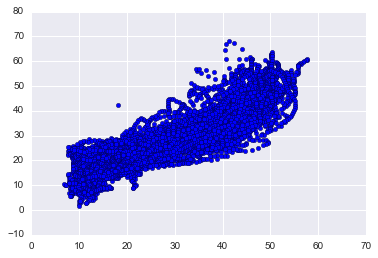

In [114]:
y = transformed['Birth rate, crude (per 1,000 people)']
X = transformed.ix[:, 4:]

model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))

In [115]:
# Using Statsmodels
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.961
Model:                                              OLS   Adj. R-squared:                  0.961
Method:                                   Least Squares   F-statistic:                 3.307e+04
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:18:53   Log-Likelihood:                -34678.
No. Observations:                                 10650   AIC:                         6.937e+04
Df Residuals:                                     10642   BIC:                         6.943e+04
Df Model:                                             8                                         
Covariance Type:                              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
date                                           0.0428      0.000    137.878      0.000         0.042     0.043
Agriculture, value added (% of GDP)            0.0866      0.006     13.445      0.000         0.074     0.099
CO2 emissions (metric tons per capita)         0.0272      0.010      2.685      0.007         0.007     0.047
GDP growth (annual %)                          0.0744      0.010      7.354      0.000         0.055     0.094
GNI per capita, Atlas method (current US$)    -0.0001   6.78e-06    -15.116      0.000        -0.000 -8.91e-05
Inflation, GDP deflator (annual %)            -0.0001      0.000     -0.916      0.360        -0.000     0.000
Life expectancy at birth, total (years)       -0.8937      0.008   -105.410      0.000        -0.910    -0.877
Population, total                          -8.162e-09   5.94e-10    -13.747      0.000     -9.33e-09    -7e-09
==============================================================================
Omnibus:                       39.701   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.396
Skew:                           0.011   Prob(JB):                     2.54e-12
Kurtosis:                       3.346   Cond. No.                     1.81e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Adding in dummy variables for the income level and change

In [116]:
income_dummies = pd.get_dummies(transformed['income level'])
transformedwithdummies = transformed.join(income_dummies.ix[:, 1:])
change_dummies = pd.get_dummies(transformed['change'])
transformedwithdummies = transformedwithdummies.join(change_dummies.ix[:, 1:])
transformedwithdummies.head()

country income level change  Birth rate, crude (per 1,000 people)  \
1  Afghanistan   Low income     up                                51.374   
2  Afghanistan   Low income     up                                51.464   
3  Afghanistan   Low income     up                                51.544   
4  Afghanistan   Low income     up                                51.614   
5  Afghanistan   Low income     up                                51.668   

   date  Agriculture, value added (% of GDP)  \
1  1961                            39.495305   
2  1962                            39.495305   
3  1963                            39.495305   
4  1964                            39.495305   
5  1965                            39.495305   

   CO2 emissions (metric tons per capita)  GDP growth (annual %)  \
1                                0.053615                3.35766   
2                                0.073781                3.35766   
3                                0.074251                3.35766   
4                                0.086317                3.35766   
5                                0.101499                3.35766   

   GNI per capita, Atlas method (current US$)  \
1                                  324.544674   
2                                  324.544674   
3                                  324.544674   
4                                  324.544674   
5                                  324.544674   

   Inflation, GDP deflator (annual %)  \
1                           40.275333   
2                           40.275333   
3                           40.275333   
4                           40.275333   
5                           40.275333   

   Life expectancy at birth, total (years)  Population, total  Low income  \
1                                32.777439          9164945.0         1.0   
2                                33.219902          9343772.0         1.0   
3                                33.657878          9531555.0         1.0   
4                                34.092878          9728645.0         1.0   
5                                34.525390          9935358.0         1.0   

   Lower middle income  Upper middle income   up  
1                  0.0                  0.0  1.0  
2                  0.0                  0.0  1.0  
3                  0.0                  0.0  1.0  
4                  0.0                  0.0  1.0  
5                  0.0                  0.0  1.0

# Looking at the data frame again

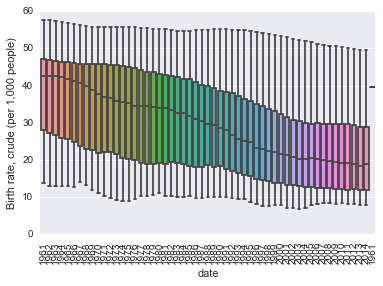

In [117]:
brplot = sns.boxplot(transformedwithdummies['date'], transformedwithdummies['Birth rate, crude (per 1,000 people)'])
brplot.set_xticklabels(transformedwithdummies['date'], rotation=90)

In [118]:
transformedwithdummies[ transformedwithdummies['income level'] == "Not classified"].head()

Empty DataFrame
Columns: [country, income level, change, Birth rate, crude (per 1,000 people), date, Agriculture, value added (% of GDP), CO2 emissions (metric tons per capita), GDP growth (annual %), GNI per capita, Atlas method (current US$), Inflation, GDP deflator (annual %), Life expectancy at birth, total (years), Population, total, Low income, Lower middle income, Upper middle income, up]
Index: []

In [119]:
transformedwithdummies[ transformedwithdummies['income level'] == "High income"]["country"].unique()

array(['Andorra', 'Antigua and Barbuda', 'Aruba', 'Australia', 'Austria',
       'Bahamas, The', 'Bahrain', 'Barbados', 'Belgium', 'Bermuda',
       'Brunei Darussalam', 'Canada', 'Cayman Islands', 'Channel Islands',
       'Chile', 'Croatia', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'French Polynesia', 'Germany', 'Greece', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao SAR, China', 'Malta', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'San Marino', 'Saudi Arabia', 'Seychelles',
       'Singapore', 'Sint Maarten (Dutch part)', 'Slovak Republic',
       'Slovenia', 'Spain', 'St. Kitts and Nevis',
       'St. Martin (French part)', 'Sweden', 'Switzerland

In [120]:
transformedwithdummies[ transformedwithdummies['income level'] == "Upper middle income"]["country"].unique()

array(['Albania', 'Algeria', 'Angola', 'Azerbaijan', 'Belarus', 'Belize',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Georgia',
       'Grenada', 'Guyana', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Lebanon', 'Libya', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Marshall Islands', 'Mauritius', 'Mexico',
       'Montenegro', 'Namibia', 'Palau', 'Panama', 'Paraguay', 'Peru',
       'Romania', 'Russian Federation', 'Serbia', 'South Africa',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Suriname',
       'Thailand', 'Turkey', 'Turkmenistan', 'Venezuela, RB'], dtype=object)

In [121]:
transformedwithdummies[ transformedwithdummies['income level'] == "Lower middle income"]["country"].unique()

array(['Armenia', 'Bangladesh', 'Bhutan', 'Bolivia', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti',
       'Egypt, Arab Rep.', 'El Salvador', 'Ghana', 'Guatemala', 'Honduras',
       'India', 'Indonesia', 'Kenya', 'Kiribati', 'Kosovo',
       'Kyrgyz Republic', 'Lao PDR', 'Lesotho', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco',
       'Myanmar', 'Nicaragua', 'Nigeria', 'Pakistan', 'Papua New Guinea',
       'Philippines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands',
       'Sri Lanka', 'Sudan', 'Swaziland', 'Syrian Arab Republic',
       'Tajikistan', 'Timor-Leste', 'Tonga', 'Tunisia', 'Ukraine',
       'Uzbekistan', 'Vanuatu', 'Vietnam', 'West Bank and Gaza',
       'Yemen, Rep.', 'Zambia'], dtype=object)

In [122]:
transformedwithdummies[ transformedwithdummies['income level'] == "Low income"]["country"].unique()

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Eritrea', 'Ethiopia', 'Gambia, The', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique',
       'Nepal', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zimbabwe'], dtype=object)

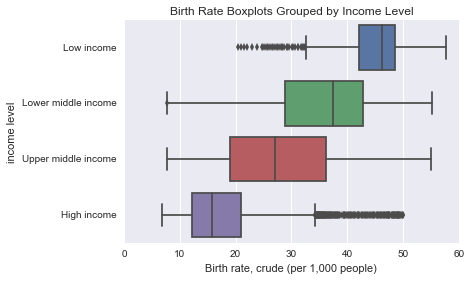

In [123]:
sns.boxplot(x="Birth rate, crude (per 1,000 people)", y="income level", 
            data=transformedwithdummies, 
            order=["Low income", "Lower middle income", "Upper middle income", "High income"])
plt.title("Birth Rate Boxplots Grouped by Income Level")

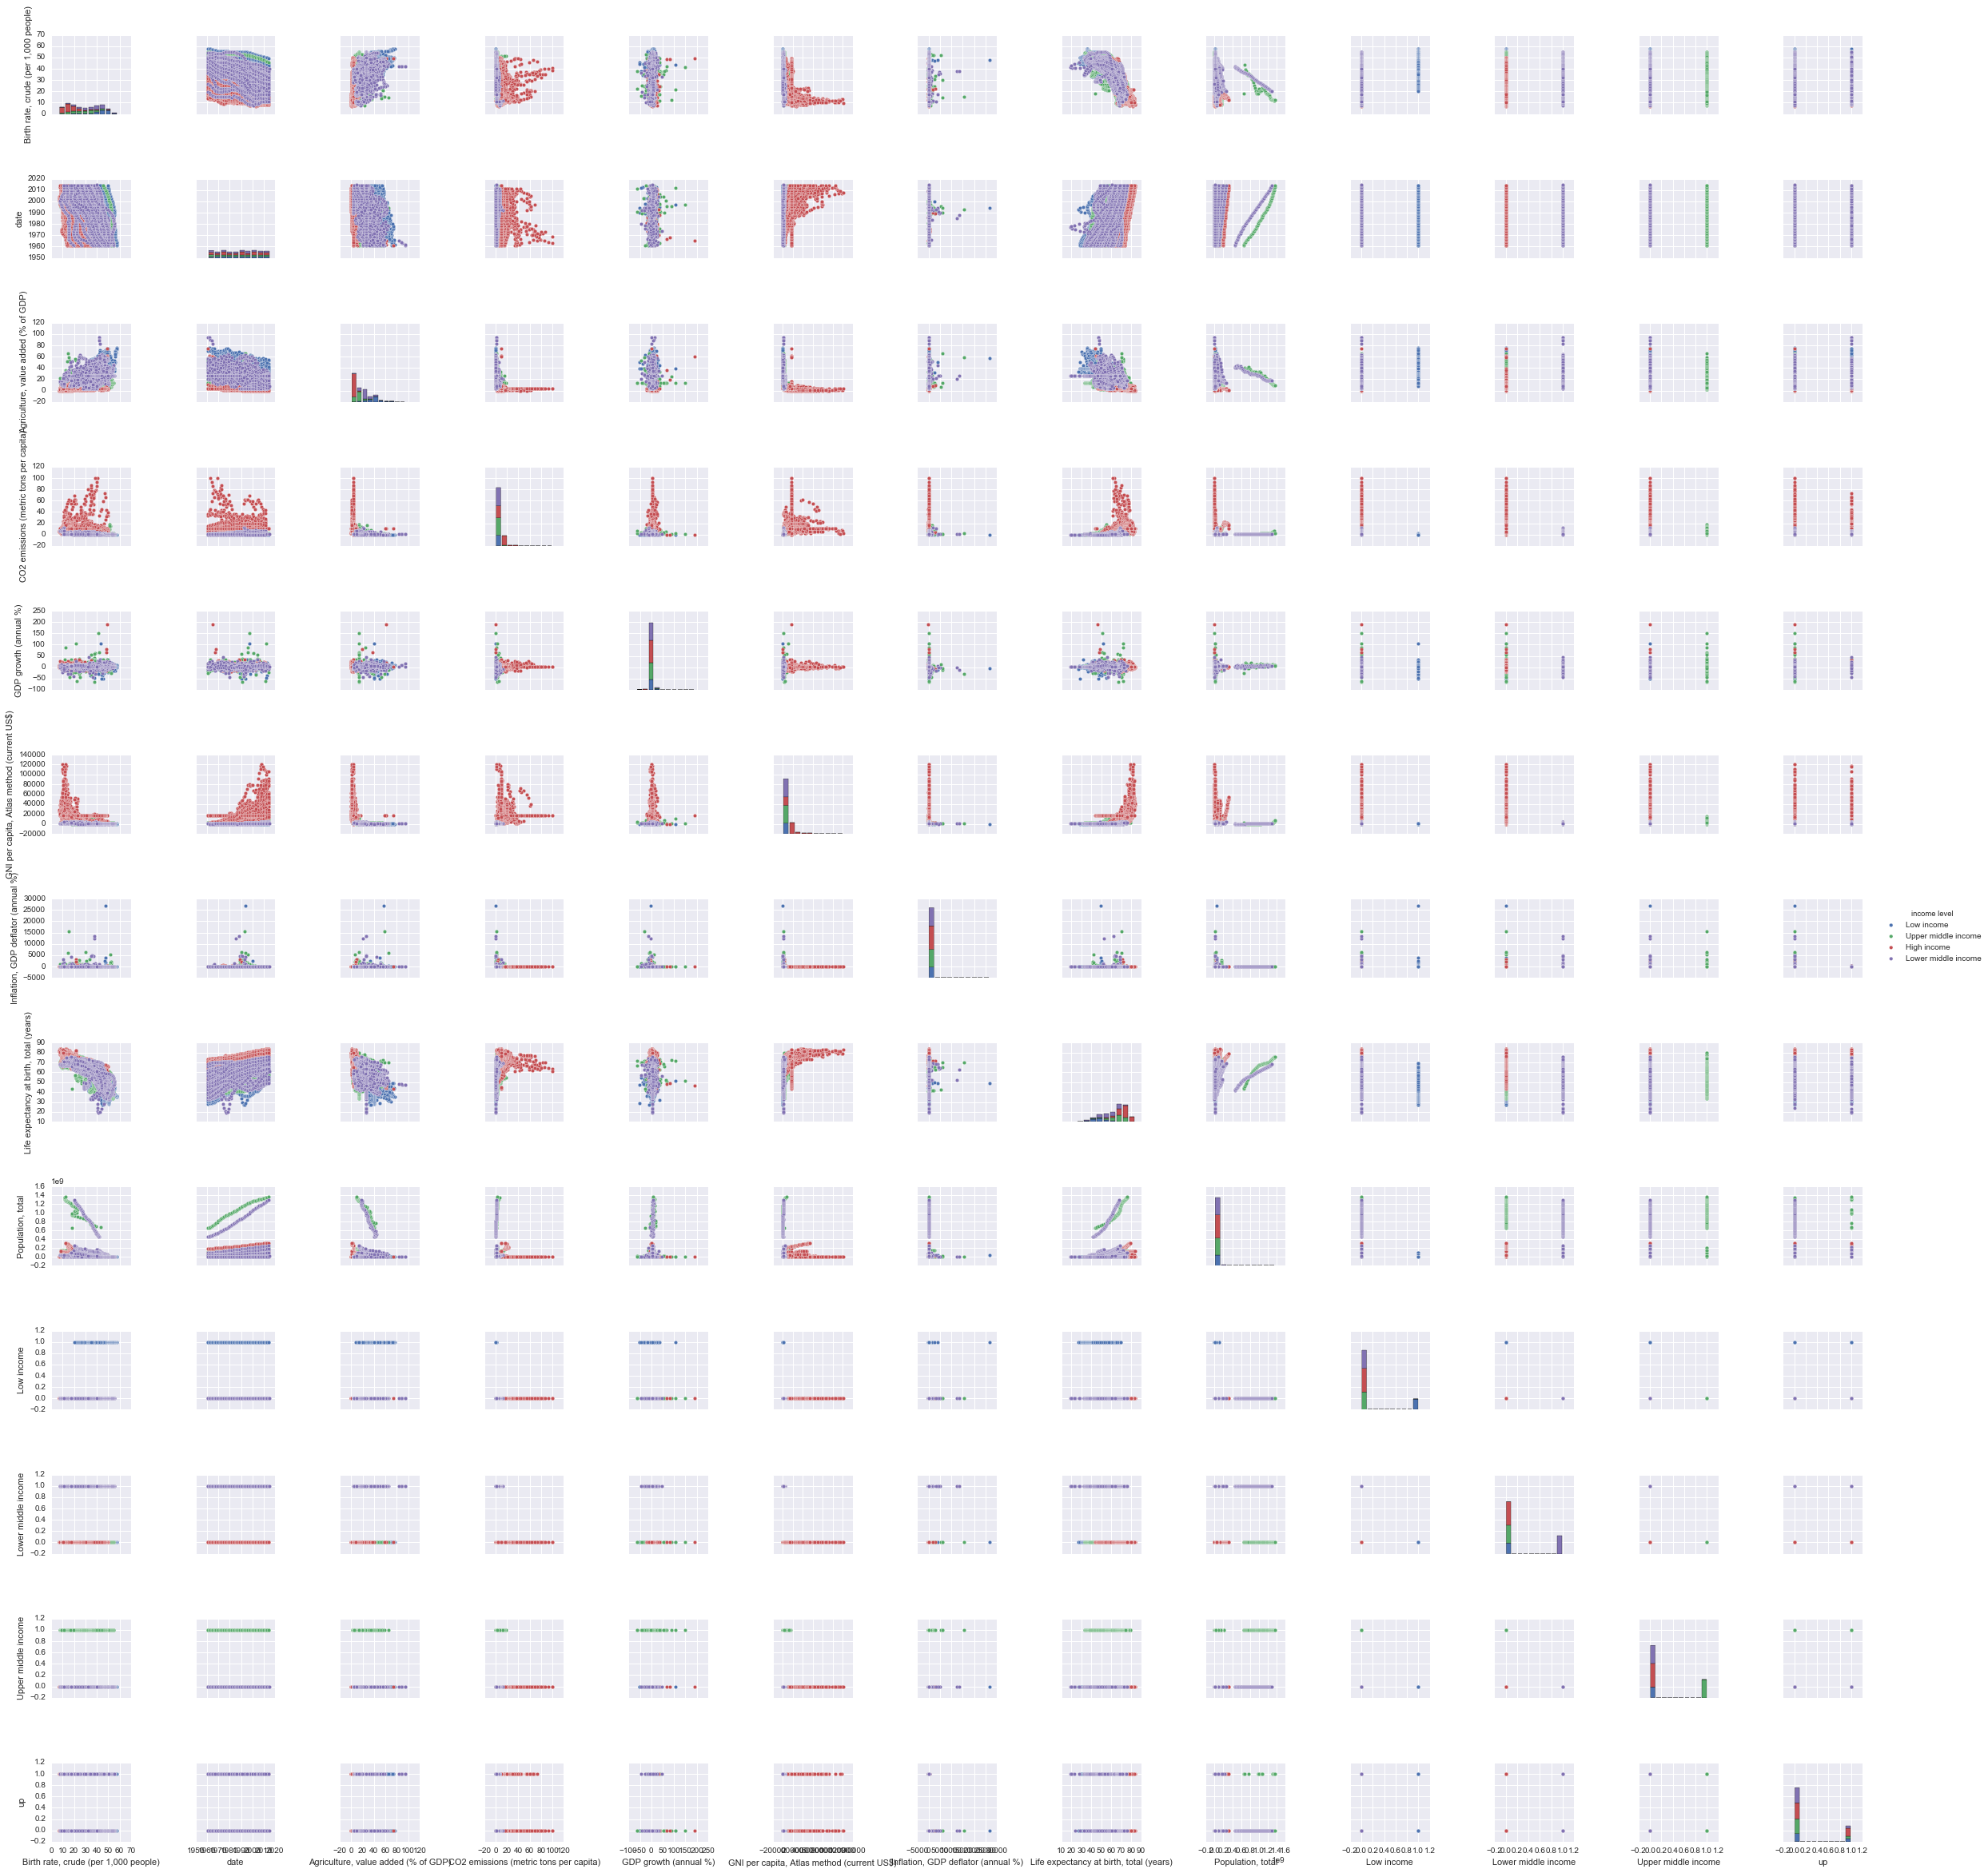

In [124]:
sns.pairplot(transformedwithdummies, hue = "income level")

IndexError: index 16 is out of bounds for axis 0 with size 16

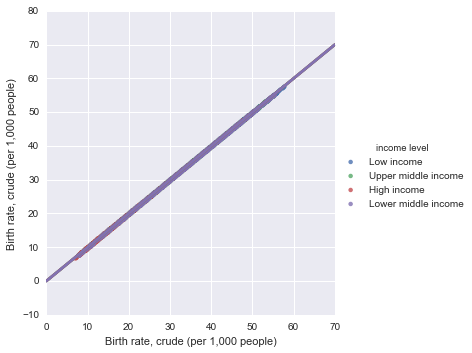

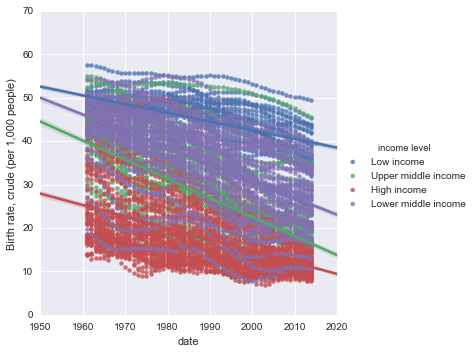

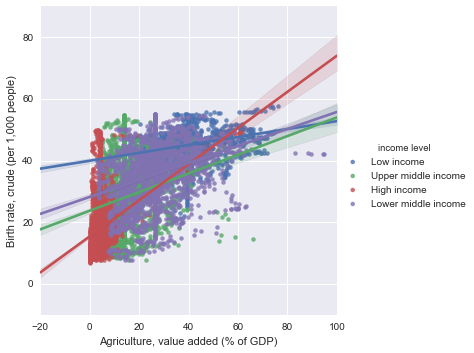

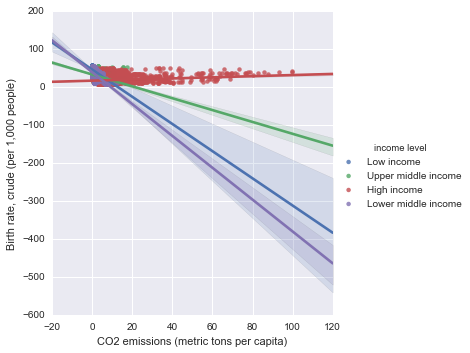

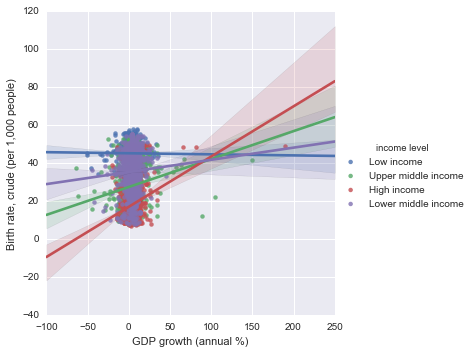

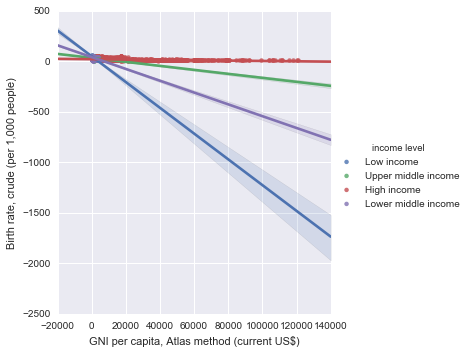

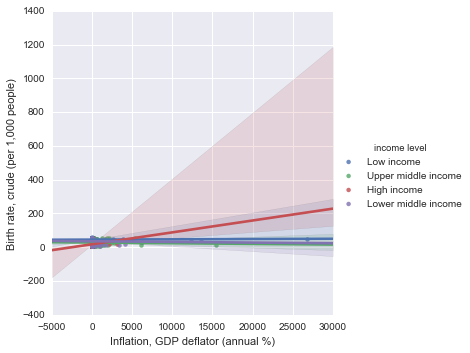

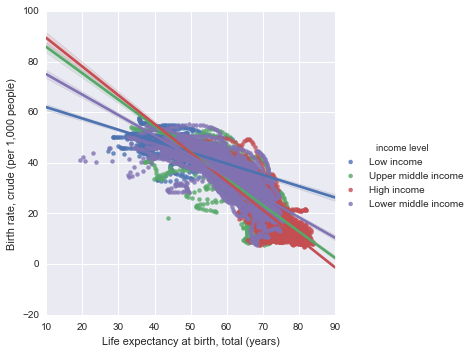

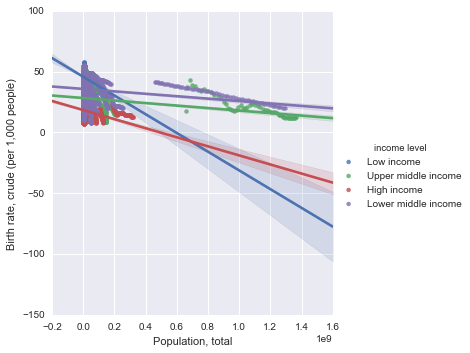

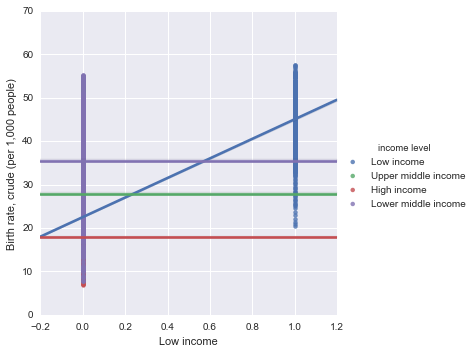

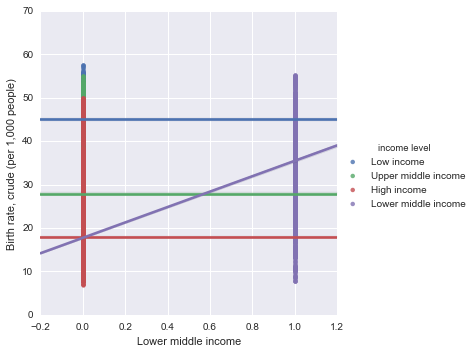

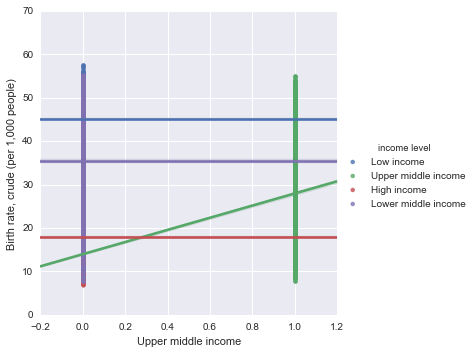

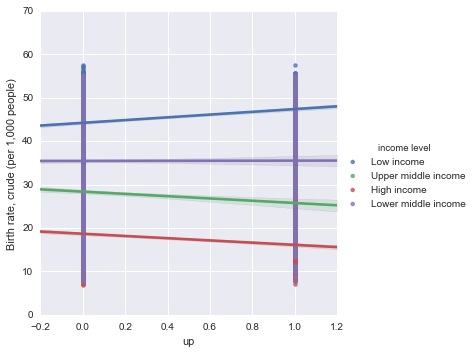

In [125]:
for i in range(3, len(transformedwithdummies)):
    sns.lmplot(x=transformedwithdummies.columns[i], y = "Birth rate, crude (per 1,000 people)", 
               data = transformedwithdummies, 
               hue = "income level")

# First linear regression with new DATA

### But first--I forgot to do it earlier--transformations: changing certain variables to logs

In [126]:
transformedwithdummies['log GNI per capita'] = transformedwithdummies['GNI per capita, Atlas method (current US$)'].apply(np.log)
transformedwithdummies['log CO2 emissions'] = transformedwithdummies['CO2 emissions (metric tons per capita)'].apply(np.log)
transformedwithdummies['log population'] = transformedwithdummies['Population, total'].apply(np.log)

In [127]:
transformedwithdummies.head()

country income level change  Birth rate, crude (per 1,000 people)  \
1  Afghanistan   Low income     up                                51.374   
2  Afghanistan   Low income     up                                51.464   
3  Afghanistan   Low income     up                                51.544   
4  Afghanistan   Low income     up                                51.614   
5  Afghanistan   Low income     up                                51.668   

   date  Agriculture, value added (% of GDP)  \
1  1961                            39.495305   
2  1962                            39.495305   
3  1963                            39.495305   
4  1964                            39.495305   
5  1965                            39.495305   

   CO2 emissions (metric tons per capita)  GDP growth (annual %)  \
1                                0.053615                3.35766   
2                                0.073781                3.35766   
3                                0.074251                3.35766   
4                                0.086317                3.35766   
5                                0.101499                3.35766   

   GNI per capita, Atlas method (current US$)  \
1                                  324.544674   
2                                  324.544674   
3                                  324.544674   
4                                  324.544674   
5                                  324.544674   

   Inflation, GDP deflator (annual %)  \
1                           40.275333   
2                           40.275333   
3                           40.275333   
4                           40.275333   
5                           40.275333   

   Life expectancy at birth, total (years)  Population, total  Low income  \
1                                32.777439          9164945.0         1.0   
2                                33.219902          9343772.0         1.0   
3                                33.657878          9531555.0         1.0   
4                                34.092878          9728645.0         1.0   
5                                34.525390          9935358.0         1.0   

   Lower middle income  Upper middle income   up  log GNI per capita  \
1                  0.0                  0.0  1.0            5.782423   
2                  0.0                  0.0  1.0            5.782423   
3                  0.0                  0.0  1.0            5.782423   
4                  0.0                  0.0  1.0            5.782423   
5                  0.0                  0.0  1.0            5.782423   

   log CO2 emissions  log population  
1          -2.925927       16.030896  
2          -2.606649       16.050221  
3          -2.600299       16.070118  
4          -2.449734       16.090585  
5          -2.287710       16.111610

In [128]:
transformedwithdummies = transformedwithdummies.drop('GNI per capita, Atlas method (current US$)', 1)
transformedwithdummies = transformedwithdummies.drop('CO2 emissions (metric tons per capita)', 1)
transformedwithdummies = transformedwithdummies.drop('Population, total', 1)


IndexError: index 16 is out of bounds for axis 0 with size 16

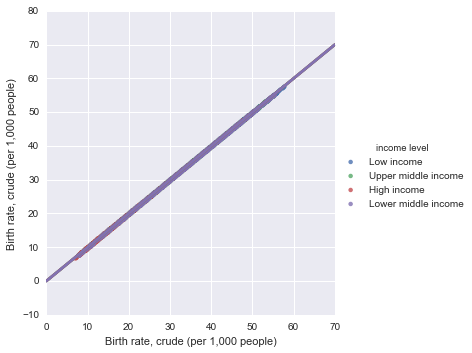

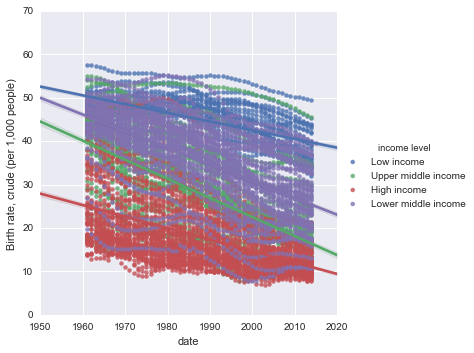

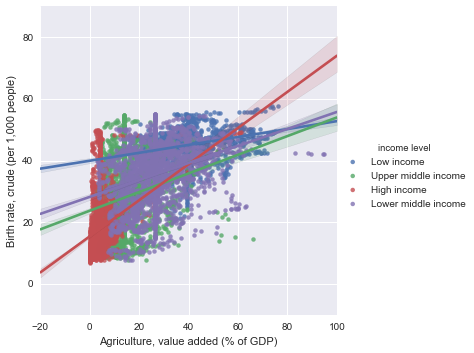

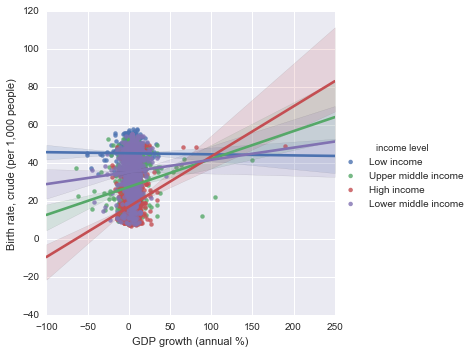

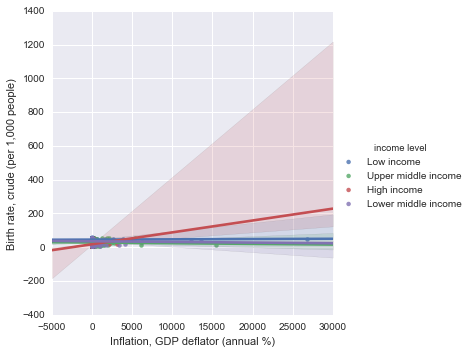

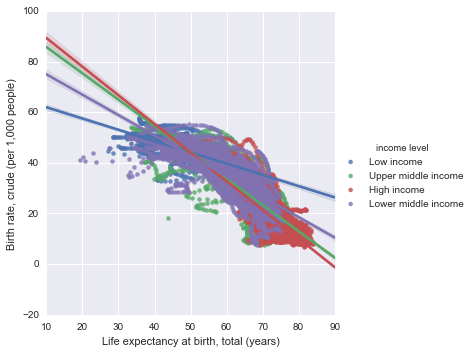

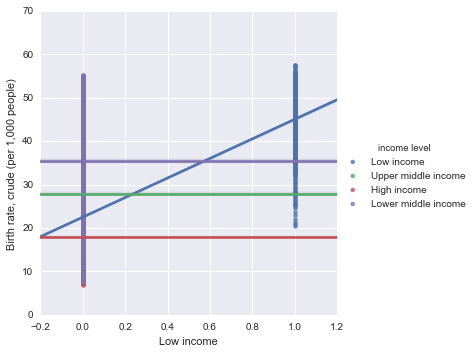

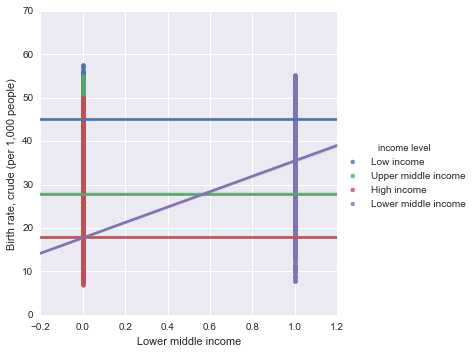

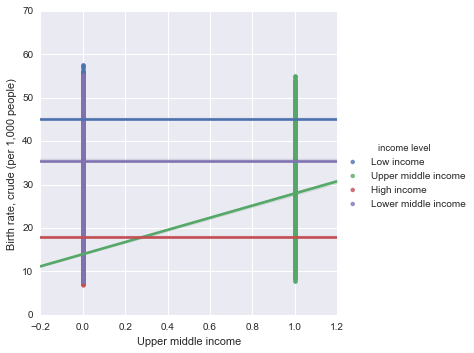

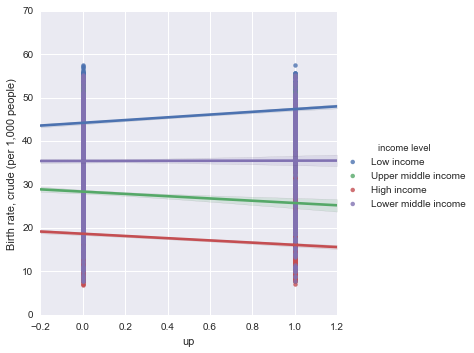

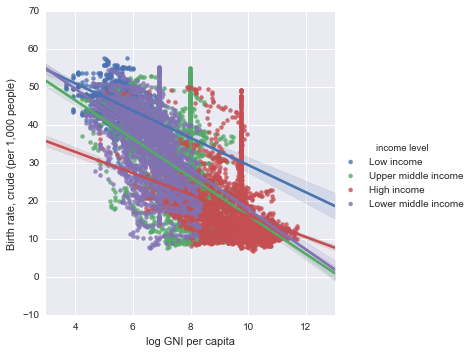

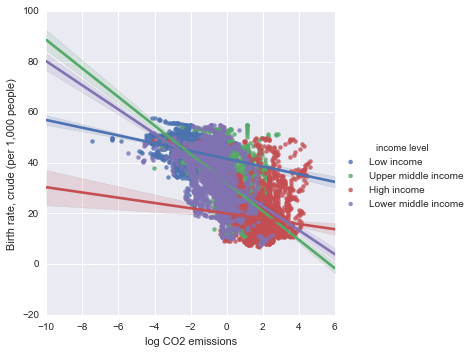

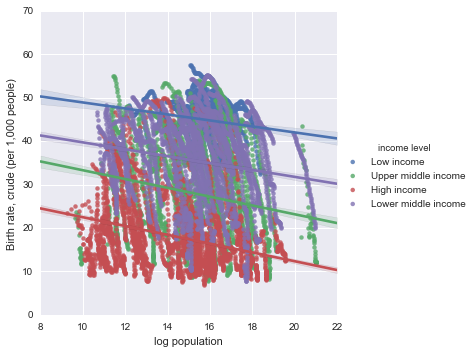

In [129]:
# re-plotting the transformed data

for i in range(3, len(transformedwithdummies)):
    sns.lmplot(x=transformedwithdummies.columns[i], y = "Birth rate, crude (per 1,000 people)", 
               data = transformedwithdummies, 
               hue = "income level")

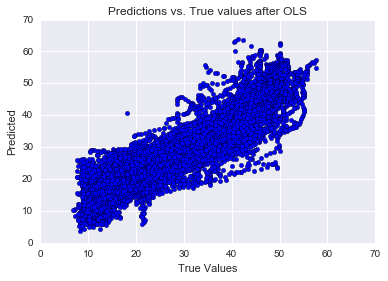

In [130]:
y = transformedwithdummies['Birth rate, crude (per 1,000 people)']
X = transformedwithdummies.ix[:, 4:]

model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.scatter(y, results.predict(X))
plt.title('Predictions vs. True values after OLS')
plt.xlabel('True Values')
plt.ylabel('Predicted')

In [131]:
# Using Statsmodels
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Birth rate, crude (per 1,000 people)   R-squared:                       0.964
Model:                                              OLS   Adj. R-squared:                  0.964
Method:                                   Least Squares   F-statistic:                 2.392e+04
Date:                                  Tue, 30 Aug 2016   Prob (F-statistic):               0.00
Time:                                          23:22:45   Log-Likelihood:                -34258.
No. Observations:                                 10650   AIC:                         6.854e+04
Df Residuals:                                     10638   BIC:                         6.863e+04
Df Model:                                            12                                         
Covariance Type:                              nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
date                                        0.0505      0.001     99.880      0.000         0.050     0.052
Agriculture, value added (% of GDP)        -0.0069      0.008     -0.842      0.400        -0.023     0.009
GDP growth (annual %)                       0.0632      0.010      6.463      0.000         0.044     0.082
Inflation, GDP deflator (annual %)         -0.0001      0.000     -0.825      0.409        -0.000     0.000
Life expectancy at birth, total (years)    -0.8308      0.009    -89.821      0.000        -0.849    -0.813
Low income                                  0.7260      0.410      1.770      0.077        -0.078     1.530
Lower middle income                         1.7603      0.286      6.156      0.000         1.200     2.321
Upper middle income                         1.3978      0.205      6.832      0.000         0.997     1.799
up                                         -1.7662      0.141    -12.484      0.000        -2.044    -1.489
log GNI per capita                         -1.2158      0.084    -14.526      0.000        -1.380    -1.052
log CO2 emissions                          -0.4616      0.077     -6.015      0.000        -0.612    -0.311
log population                             -0.6322      0.029    -21.762      0.000        -0.689    -0.575
==============================================================================
Omnibus:                      149.251   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.010
Skew:                           0.045   Prob(JB):                     1.92e-60
Kurtosis:                       3.782   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
from sklearn import metrics
metrics.mean_squared_error(y, results.predict(X))

36.437564467308988

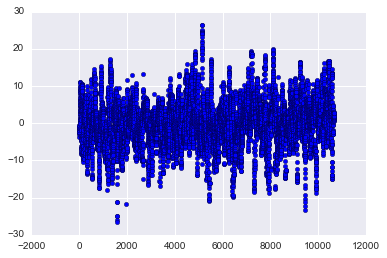

In [133]:
plt.scatter(range(len(results.resid)), results.resid)

# Trying the random forests with this dataframe

In [134]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5)
randomforest_results = model.fit(X,y)

In [135]:
print "Mean Square Errors:", metrics.mean_squared_error(y, randomforest_results.predict(X))
print "Random Forest Score output:", randomforest_results.score(X, y)
pd.DataFrame({'Features': X.columns, 'Importance Score': randomforest_results.feature_importances_})

Mean Square Errors: 22.3703004685
Random Forest Score output: 0.870197752839


Features  Importance Score
0                                      date          0.015809
1       Agriculture, value added (% of GDP)          0.006292
2                     GDP growth (annual %)          0.000262
3        Inflation, GDP deflator (annual %)          0.000773
4   Life expectancy at birth, total (years)          0.942377
5                                Low income          0.001543
6                       Lower middle income          0.000000
7                       Upper middle income          0.000127
8                                        up          0.000000
9                        log GNI per capita          0.003099
10                        log CO2 emissions          0.020007
11                           log population          0.009711

This seems pretty good!  But I'll go back to OLS for a bit to test out that model~

# GRIDSEARCH with linear regression

In [136]:
from sklearn.cross_validation import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [138]:
y = transformedwithdummies['Birth rate, crude (per 1,000 people)']
X = transformedwithdummies.ix[:, 4:]

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

print "Mean Squared Error of Predictions vs. True values of Test data"
print metrics.mean_squared_error(y_test, results.predict(X_test))

Mean Squared Error of Predictions vs. True values of Test data
35.5364521569


In [139]:
from sklearn import grid_search
alphas = np.logspace(-10, 10, 100)
gs = grid_search.GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.59228e-10, ...,   6.28029e+09,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [140]:
print "BEST Alpha found for training set:", gs.best_params_
print "BEST Score for the training set:", -gs.best_score_

BEST Alpha found for training set: {'alpha': 0.49770235643321137}
BEST Score for the training set: 34.0488731923


In [141]:
gs_pred = gs.predict(X_test)
print "Mean Squared Error of Predictions vs. Test data using best Ridge Alpha:", metrics.mean_squared_error(y_test, gs_pred)

Mean Squared Error of Predictions vs. Test data using best Ridge Alpha: 32.4099812113


In [145]:
from sklearn import grid_search
from sklearn import cross_validation

alphas = np.logspace(-10, 10, 100)
gs2 = grid_search.GridSearchCV(
    cv=cross_validation.KFold(len(X_train), n_folds=5, shuffle=True),
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs2.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=6390, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.59228e-10, ...,   6.28029e+09,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [146]:
print "BEST Alpha found for training set:", gs2.best_params_
print "BEST Score for the training set:", -gs2.best_score_
gs2_pred = gs2.predict(X_test)
print "Mean Squared Error of Predictions vs. Test data using best Lasso Alpha:", metrics.mean_squared_error(y_test, gs2_pred)

BEST Alpha found for training set: {'alpha': 1e-10}
BEST Score for the training set: 34.0522211408
Mean Squared Error of Predictions vs. Test data using best Lasso Alpha: 32.4141239907


#### REMARKS
Honestly I'm not sure how Lasso and Ridge have faired comparatively (very close!).  I intuitively think that Lasso is better, based on the fact that I don't have too many predictors, and it's easier to have effect by just dropping some.  

Also I did the grid search on the linear model, however my first regressions show that the Random Forest Regression may be better than any of the OLS models.  Therefore I'm going to go forward with using the Random Forest Regression and grid search.

# RANDOM FOREST PIPELINE
PCA and RandomForest

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# functions for pipeline
RFR = RandomForestRegressor() 
pca = decomposition.PCA()

# setting parameters
parameters = dict(pca__n_components = [2,3], 
                  random_forest__n_estimators=[10, 20, 30, 40, 50, 100, 200, 300],
                  random_forest__max_depth = [2,3,4,5])

steps = [('pca', pca),
        ('random_forest', RFR)]

pipeline = Pipeline(steps)

# standardize the variables
X2 = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=2)

# Fitting pipeline
estimator = grid_search.GridSearchCV(pipeline,parameters,cv = 5, 
                                     scoring = 'mean_squared_error')
grid_result = estimator.fit(X_train, y_train)                         

In [148]:
grid_result.best_params_

{'pca__n_components': 3,
 'random_forest__max_depth': 5,
 'random_forest__n_estimators': 300}

In [149]:
print grid_result.best_params_

{'pca__n_components': 3, 'random_forest__n_estimators': 300, 'random_forest__max_depth': 5}


In [150]:
y_predictions = grid_result.predict(X_test)

In [151]:
print "Error on Training data:", metrics.mean_squared_error(y_train, grid_result.predict(X_train))
print "Error on Test data:", metrics.mean_squared_error(y_test, y_predictions)

Error on Training data: 37.480501068
Error on Test data: 37.1228727908


In [152]:
grid_result.best_estimator_

Pipeline(steps=[('pca', PCA(copy=True, n_components=3, whiten=False)), ('random_forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

### Trying this without the pipeline...
for some reason this isn't feeding me the same score as the above

In [153]:
pca = decomposition.PCA(n_components=3)
pca_Xtransformed = pca.fit_transform(X_train)
new_X_train = pd.DataFrame()
new_X_train["pca1"] = pca_Xtransformed[:, 0]
new_X_train["pca2"] = pca_Xtransformed[:, 1]
new_X_train["pca3"] = pca_Xtransformed[:, 2]
# new_X_train["pca4"] = pca_Xtransformed[:, 3]

In [154]:
pca_X = pca.fit(X_train)
pca_X.explained_variance_ratio_
# I actually don't think that this captures too much of my explained variance

array([ 0.33352672,  0.1104205 ,  0.1054518 ])

In [155]:
best_RFR = RandomForestRegressor(max_depth = 5, n_estimators=200)
best_RFR_fit = best_RFR.fit(new_X_train, y_train)
metrics.mean_squared_error(y_train, best_RFR_fit.predict(new_X_train))

37.48515508472407

In [156]:
metrics.mean_squared_error(y_test, best_RFR_fit.predict(pca.fit_transform(X_test)))

47.089029449034761

Regardless, I don't think that the random forest model is fitting my data quite as well as the Regularized OLS.  So I will at last choose regularized OLS to do my final tinkering with.

# Cross Validation

I am using the best model from above (OLS with Lasso regularization) as my model to test using CV.

In [157]:
from sklearn import cross_validation

In [158]:
kf = cross_validation.KFold(len(X), n_folds=10, shuffle=True)

In [159]:
model = linear_model.Ridge(alpha =  0.00046415888336127822)

mse_values = []
scores = []
n=0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train, test in kf:
    result = model.fit(X.iloc[train], y.iloc[train])
    mse_values.append(metrics.mean_squared_error(y.iloc[test], result.predict(X.iloc[test])))
    scores.append(result.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print ""
print ""


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 31.2373297639
R2: 0.807136468363
Model 2
MSE: 34.121906999
R2: 0.807146021597
Model 3
MSE: 33.5674347841
R2: 0.807113859223
Model 4
MSE: 35.5971417292
R2: 0.807122044611
Model 5
MSE: 32.0462270319
R2: 0.807097536424
Model 6
MSE: 34.3720147682
R2: 0.807131916634
Model 7
MSE: 33.6167443444
R2: 0.807141736562
Model 8
MSE: 31.4434999687
R2: 0.807151854204
Model 9
MSE: 35.7264725333
R2: 0.807143127119
Model 10
MSE: 31.4081073262
R2: 0.807142644228


~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 33.3136879249
Mean of R2 for all folds: 0.807132720896


The model seems to be behaving fairly well over the whole length of the data

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
last = model.fit(X,y)
last.coef_
sum((y - last.predict(X))**2) / len(X)

33.234764735323509

In [161]:
model.coef_

array([ -1.04018946e-01,  -3.85895069e-02,   6.34194283e-02,
        -4.26011611e-05,  -6.86090509e-01,   7.19778816e+00,
         5.78209490e+00,   3.57722254e+00,  -1.98998441e+00,
        -5.82825257e-01,  -5.63665690e-01,  -5.73552388e-01])

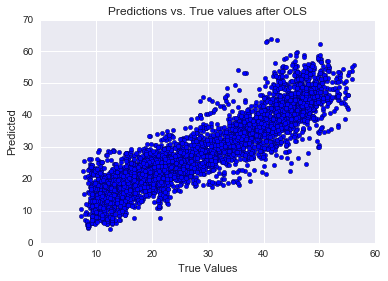

In [162]:
sns.plt.scatter(y_test, model.predict(X_test))
plt.title('Predictions vs. True values after OLS')
plt.xlabel('True Values')
plt.ylabel('Predicted')

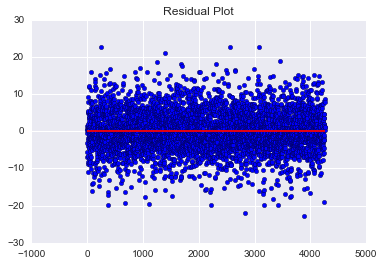

In [163]:
sns.plt.scatter(range(len(y_test)), model.predict(X_test) - y_test)
sns.plt.hlines(0, 0, len(y_test), color = "r")
plt.title("Residual Plot")

# Conclusion

Apparently, this data was better than I personally expected for modeling.  I was able to check my data on separated test sets with what seems to be decent accuracy.  Unfortunately I don't have a whole lot to compare this to.  It was mostly a project that I have used to see how I can change data models and work with Python.

The most important feature as determined by this model is the Life expectancy at birth, which I did not expect to be the most important factor. However, it does make some sense upon further thought.

In the future I'd try to add more time series elements to my project.  I also think it would be best to double check if all my variables are necessary in the model, or if I can drop a couple more.  Perhaps it would be fun to try out different variables or add in things that might not seem particularly related.